# Практикум по стохастическому анализу

##### Ковшов Илья

### Task 1

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

from scipy.stats import poisson, f, t, chi2, norm, cauchy, probplot
from scipy.stats import binom, geom, expon # for example

import seaborn as sns

from scipy.special import factorial


#### Task 1.1

In [7]:
def Bernoulli_schemes(p, size=1):
    '''
        p - probability, 
        0 <= p <= 1
        size - np.array or  type which can be converted to it
    '''
    if type(size) is not np.ndarray:
        size = np.array(size)
    if p < 0 or p > 1:
        raise Exception(f'This is not probability must [0;1], given {p}')
    if np.any(size < 0):
        raise Exception(f'Invalid size {size}')
    # np.random.rand?
    data_uniform = np.random.uniform(low=0, high=1, size=size)    
    return np.array(data_uniform < p, dtype=int)

In [3]:
p = 0.6
#size = np.array([2, 5])
size = [2, 5]
bern_sample = Bernoulli_schemes(p, size)
bern_sample

array([[1, 0, 1, 1, 0],
       [1, 1, 0, 1, 0]])

In [5]:
def Bin_distr(n : int, p, size=1):
    '''
        p - probability, 
        0 <= p <= 1
        n - number of tests
        size - np.array or  type which can be converted to it
    '''
    if type(size) is not np.ndarray:
        size = np.array(size)
    return Bernoulli_schemes(p, np.concatenate(([n], size.flatten()))).sum(axis=0)

In [6]:
n = 10
p = 0.5
size = [2, 5]
p_bin_dist = Bin_distr(n, p, size)
p_bin_dist

array([[7, 7, 3, 4, 3],
       [4, 5, 8, 2, 3]])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


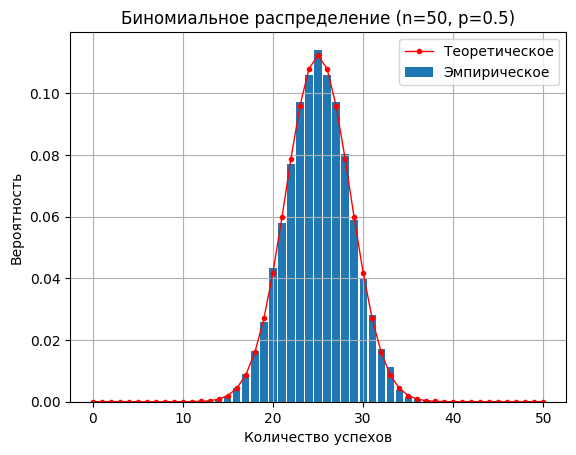

In [7]:
n = 50
N = 10 ** 4
size = [1, N]
p_bin_dist = Bin_distr(n, p, size)

values, counts = np.unique(p_bin_dist, return_counts=True)


k = np.arange(0, n + 1)


# Вычисляем вероятности для каждого значения k
binom_dist = binom.pmf(k, n, p)

# Строим график
plt.bar(values, counts / N, label='Эмпирическое')
plt.plot(k, binom_dist, 'o-', color='r', markersize=3, linewidth=1, label='Теоретическое')
plt.title('Биномиальное распределение (n={}, p={})'.format(n, p))
plt.xlabel('Количество успехов')
plt.ylabel('Вероятность')
plt.grid(True)
plt.legend()

plt.savefig('1_1.eps', format='eps')

plt.show()

#### Task 1.2

Я выбираю для геометрического распределения определение с номером первого успеха. \
Соответственно имеем
$$
 n \geq 1,~ 0 \leq p \leq 1,~ q \equiv 1 -p.
$$
Ф-ия вер-ти в данном случае будет равна
$$
    P(\xi = k) = q^{k-1}p.
$$
Если моделировать это с помощью испытаний Бернулли, то получается будет $k-1$ неудача, а на $k$-ом номере будет успех. \
Посчитаем вер-ть успеха на одном из первых $n+1$ испытаний. 
$$
    S_{n+1} = \sum_{i=1}^{n+1} p (1-p)^{i-1} = \text{ |сумма геометрической прогресии| }= 1 - (1-p)^{n+1}
$$
Теперь рассмотрим событие $A$ - номер первого успеха равен $n$, тогда мы можем интерпретировать его как нахождение случайной величины в промежутке $S_n$ и $S_{n+1}$.

$$
\begin{gathered}
\{\xi=n\}=
\left\{S_n < \alpha \leq S_{n+1}\right\}=
\left\{1-(1-p)^n < \alpha \leq 1-(1-p)^{n + 1}\right\}= \\
=\left\{(1-p)^{n+1} \leq 1-\alpha<(1-p)^n\right\}=\{(n+1) \ln (1-p) \leq \ln (1-\alpha)<n \ln (1-p)\}=\left\{n<\frac{\ln (1-\alpha)}{\ln (1-p)} \leq n+1\right\}
\end{gathered}
$$

Получаем:
$$
\xi=\left\lfloor \frac{\ln (1 - \alpha)}{\ln (1-p)}\right\rfloor.
$$
Или же можно заменить $1 - \alpha$ на $\alpha$, потому что $\alpha \sim U[0,1]$:
$$
\xi=\left\lfloor \frac{\ln (\alpha)}{\ln (1-p)}\right\rfloor.
$$


In [8]:
def geom_distr(p):
    '''
        Number of the first success
        Build sample by definition

        p - probability, 
        0 <= p <= 1
        
        Return:
        geom_data - array with zeros and ones
            "0" - fail
            "1" - success
    '''
    if p < 0 or p > 1:
        raise Exception(f'This is not probability must [0;1], given {p}')
    n = 1 # help initialize array at the end (this is no for cycle)
    while  random.random() >= p:
        n += 1 
    geom_data = np.zeros([1, n])
    geom_data[0, n-1] = 1
    return geom_data, n

In [9]:
p = 0.4
geom_data, number = geom_distr(p)
print(f"Number of the first success = {number}")
geom_data

Number of the first success = 3


array([[0., 0., 1.]])

In [89]:
def geom_distr2d(p, size):
    '''
        Build sample from estimation
    '''
    if p < 0 or p > 1:
        raise Exception(f'This is not probability must [0;1], given {p}')
    if np.any(size < 0):
        raise Exception(f'Invalid size {size}')
    # np.random.rand?
    data_uniform = np.log(np.random.uniform(low=0, high=1, size=size))
    return np.floor(data_uniform / np.log(1-p)).astype(int)

In [11]:
p = 0.1
size = np.array([1, 6])
geom_data = geom_distr2d(p, size)
geom_data

array([[ 3,  6, 12,  5, 11, 13]])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


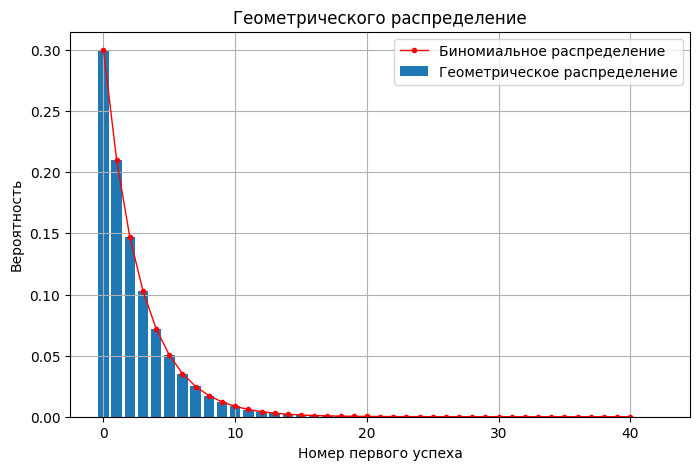

In [93]:

N = 10**6
p = 0.3
size = np.array([1, N])

# Генерируем данные для геометрического распределения
geom_data = geom_distr2d(p, size)

# Подсчитываем частоты для геометрического распределения
values_geom, counts_geom = np.unique(geom_data, return_counts=True)
probs_geom = counts_geom / N

k = np.arange(1, np.max(geom_data))
geom_dist = geom.pmf(k, p)

plt.figure(figsize=(8,5))
plt.bar(values_geom, probs_geom, label='Геометрическое распределение')
plt.plot(k - 1, geom_dist, 'o-', color='r', markersize=3, linewidth=1, label='Биномиальное распределение')
plt.title('Геометрического распределение')
plt.xlabel('Номер первого успеха')
plt.ylabel('Вероятность')
plt.grid(True)
plt.legend()

plt.savefig('1_2(geom).eps', format='eps')

plt.show()

In [13]:
geom_dist = geom.pmf(N, p)
geom_dist

0.0

##### Check for lack of memory

In [94]:
shift = 2
N = 10**6
p = 0.3
size = np.array([1, N])
geom_data1 = geom_distr2d(p, size)
geom_data1 = geom_data1[geom_data1 >= shift]
geom_data2 = geom_distr2d(p, size)

sample_geom_1 = geom_data1.flatten() - shift
sample_geom_2 = geom_data2.flatten()


In [95]:
n_bins = 30
bins = np.arange(0, n_bins)

alpha = 0.01
xlim = np.floor(np.log(alpha) / np.log(1-p)).astype(int)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


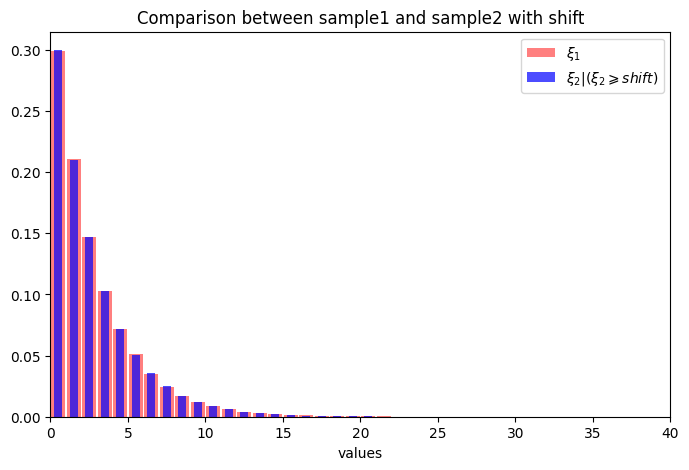

In [96]:
plt.figure(figsize=(8,5))
plt.hist(sample_geom_1, bins,
    density=True,
    rwidth=0.9,
    alpha=0.5,
    color='red',
    label='$\\xi_1$'
)
plt.hist(sample_geom_2, bins,
    density=True,
    rwidth=0.5,
    alpha=0.7,
    color='blue',
    label='$\\xi_2|(\\xi_2\\geqslant shift$)'
)

#plt.xlim([0, xlim]) # can be changed for less xlim
plt.xlim([np.minimum(geom_data1.min(), geom_data2.min()), np.minimum(geom_data1.max(), geom_data2.max())])

plt.title('Comparison between sample1 and sample2 with shift')
plt.ylabel('')
plt.xlabel('values')
plt.legend()
plt.savefig('1_2.eps', format='eps')
plt.show()



#### Task 1.3

Случайную величину из распределения для единичной игры в орлянку буду обозначать $Eagle(p)$,\
где p - вероятность "успеха". \
Математическое ожидание и дисперсия для единичной игры в орлянку.
$$
    p = 0.5, \\
    \psi \sim Eagle(p), \\
E \psi = \frac{1}{2} * 1 + \frac{1}{2} * (-1) = 0. \\
E \psi^2 = \frac{1}{2} * (1)^2 + \frac{1}{2} * (-1)^2 = 1, \\
D \psi = E \psi^2 - (E \psi)^2 = 1 - 0 = 1.
$$
Соответственно, используя центральную предельную теорему. 
$$
    Y(n) \sim N(0, 1)
$$

In [97]:
def Eagle(n):
    if np.any(n <= 0):
        raise Exception(f'Invalid n = {n}')
    p_equal = 0.5
    bern_sample = Bernoulli_schemes(p_equal, n)
    game_values = bern_sample * 2 - 1
    return np.sum(game_values)

In [98]:
p_equal = 0.5

n = 5
n_np = np.array(n)
S_n = Eagle(n_np)
S_n


-1

In [99]:
def Eagle_traj(n):
    if np.any(n <= 0):
        raise Exception(f'Invalid n = {n}')
    p_equal = 0.5
    bern_sample = Bernoulli_schemes(p_equal, n)
    game_values = bern_sample * 2 - 1
    return game_values.cumsum() / np.sqrt(np.arange(1, n+1))

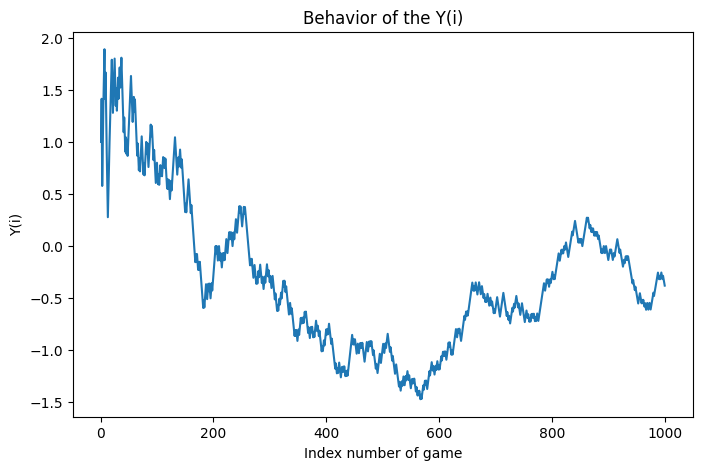

In [100]:
num_series = 10**3
list_num= np.arange(1, num_series+1)
S_i = Eagle_traj(num_series)

plt.figure(figsize=(8,5))
plt.plot(list_num, S_i)

plt.xlabel('Index number of game')
plt.ylabel('Y(i)')
plt.title('Behavior of the Y(i)')

plt.savefig('1_3.eps', format='eps')

plt.show()


In [21]:
S_i.shape

(1000,)

In [22]:
list_num.shape

(1000,)

### Task 2

#### Task 2.1

Построение ф-ии распределения лестницы Кантора через рекурсивное определение

In [23]:
def cantor_staircase(depth=10):
    # Начальные значения
    values = {0: 0, 1: 1}
    if (depth < 0):
        raise Exception(f'Invalid depth {depth}')
    
    
    # Рекурсивное построение канторовой лестницы
    def build_cantor_segment(start, end, level):
        if level == 0:
            return
        
        mid1 = (2 * start + end) / 3
        mid2 = (start + 2 * end) / 3
        
        # Среднее арифметическое
        avg_value = (values[start] + values[end]) / 2
        
        # Устанавливаем значение на центральном отрезке
        values[mid1] = avg_value
        values[mid2] = avg_value
        
        # Рекурсивно вызываем для левой и правой частей
        build_cantor_segment(start, mid1, level - 1)
        build_cantor_segment(mid2, end, level - 1)

    build_cantor_segment(0, 1, depth)
    #print(len(values))
    
    return make_sort(values)

def interp_cantor_modern(x, x_values, y_values):
    indexes_left = np.searchsorted(x_values, x)
    #indexes_right = np.searchsorted(x_values, x, side='right')
    return y_values[indexes_left]


def make_sort(values_dict):
    n = len(values_dict)
    keys = np.empty(n)
    values = np.empty(n)
    for i, key in enumerate(sorted(values_dict.keys())):
        keys[i] = key
        values[i] = values_dict[key]
    return keys, values


Генерируем 2 выборки для ф-ии распределения с разной глубиной построения

In [24]:
depth1 = 3
depth2 = 12
keys_1, values_1 = cantor_staircase(depth=depth1)
keys_2, values_2 = cantor_staircase(depth=depth2)

Интерполяция на новую выборку

In [25]:

# Генерация значений x в диапазоне [0, 1]
x_values = np.linspace(0, 1, 1000)
y_values = interp_cantor_modern(x_values, keys_2, values_2)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


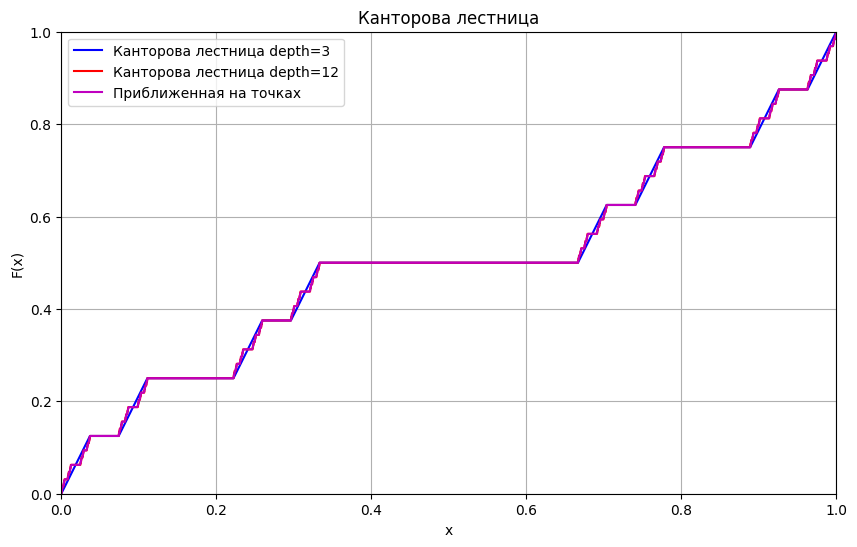

In [26]:

# Визуализация функции канторовой лестницы
plt.figure(figsize=(10, 6))
plt.plot(keys_1, values_1, color='blue', label=f'Канторова лестница depth={depth1}')
plt.plot(keys_2, values_2, color='red', label=f'Канторова лестница depth={depth2}')
plt.plot(x_values, y_values, color='m', label='Приближенная на точках')

plt.title('Канторова лестница')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid()
plt.legend()

plt.savefig('2_1.eps', format='eps')
plt.show()

Для моделирования выборки воспользуемся альтернативным определением.
Для моделирования будем использовать двоичную и троичную запись числа.

Будем брать число $x \in [0;1]$ и будем переводить его в троичную систему счисления.\
Для получения значений $F(x)$ будем отбрасывать все цифры после первой единицы в записи числа, и потом заменить в получившемся числе все $2$ на $1$, таким образом получим представление числа в двоичной системе счисления. Точки из самого Канторово множества 
представление числа, в которых нет цифры $1$.\
Воспользуемся генератором схемы Бернулли для моделирования. Тогда, умножив на 2 вектор случайных величин из схемы Бернулли получим число в троичной записи, останется конвертировать его обратно в обычную ($10$-ю) систему счисления. Необходимо ввести дополнительный параметр $\epsilon$, как степень точности получаемого числа.\
Проведём оценку:
$$
\sum_{n=N+1}^{+\infty} \frac{2 * \eta_n}{3^n} \leq \sum_{n=N+1}^{+\infty} \frac{2}{3^n}=2 * \frac{1}{(1 - \frac{1}{3}) * 3^{N+1}}=\frac{1}{3^N} \leq \epsilon
$$

Таким образом, можем получить длину дробной части числа, достаточную для получения заданной точности:
$$
N \geq \frac{\ln \frac{1}{\epsilon}}{\ln 3}
$$

Значение функции распределения можем посчитать по формуле:
$$
F(x)=\sum_{n=1}^N \frac{\eta_n}{2^n}, \quad x=\sum_{n=1}^N \frac{2 \cdot \eta_n}{3^n}
$$

Построение выборки

In [103]:
class CantorDistr:
    def __init__(self, epsilon=1e-5):
        '''
        precision: количество знаков в троичном разложении
        '''
        self.epsilon = epsilon
        
        self.N = math.ceil(math.log(1 / epsilon) / math.log(3))

        self.powers_3 = 3 ** np.arange(1, self.N + 1)
        self.powers_2 = 2 ** np.arange(1, self.N + 1)
        
        
    
    def sample(self, n):
        '''
            Generate a sample x in the Cantor set and compute F(x) with precision epsilon using matrix operations.
        '''
        p = 0.5
        
        bernoulli_samples = Bernoulli_schemes(p, [n, self.N])
        
        x = np.dot(2 * bernoulli_samples, 1 / self.powers_3)
        F_x = np.dot(bernoulli_samples, 1 / self.powers_2)
        
        return x, F_x

In [28]:
def plot_cantor_distribution(n_points=1000, epsilon=1e-5):
    dist = CantorDistr(epsilon=epsilon)

    
    # Гистограмма выборки
    samples, _ = dist.sample(n=n_points)
    plt.hist(samples, bins=50, density=True, alpha=0.7, label='Выборка')
    plt.title('Гистограмма выборки')
    plt.xlabel('x')
    plt.ylabel('Плотность')
    plt.legend()
    
    
    plt.tight_layout()

    plt.savefig('2_1(sample).eps', format='eps')
    plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


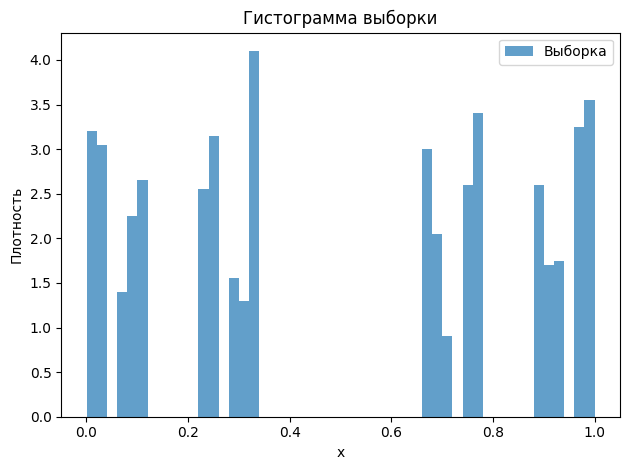

In [29]:
plot_cantor_distribution(n_points=10 ** 3)  # Построение графиков

#### Критерий согласия Колмогорова

Критерий согласия Колмогорова предназначен для проверки гипотезы о принадлежности выборки некоторому закону распределения. \
Гипотеза $ H_0 : F_n(x) \sim F(x) $. \
Проверка того, что эмпирическое распределение соответствует предполагаемой модели.

Построим эмпирическую ф-ию распределения

In [30]:
class EmpiricalDistributionFunction: # Эмпирическая ф-ия распределения
    def __init__(self, data):
        
        self.data = np.array(data)
        self.n = len(data)  # Размер выборки
        if self.n <= 0:
            raise Exception(f'Invalid size {n}')

        self.data_sorted = np.sort(self.data)
        
    def ecdf(self, x):
        """Вычисляет значение эмпирической функции распределения в точке x."""
        # Используем searchsorted для нахождения индекса
        count = np.searchsorted(self.data_sorted, x)
        return count / self.n
        #return np.sum(self.data <= x) / self.n

    def plot(self):
        """Строит график эмпирической функции распределения."""
        x = np.linspace(self.data_sorted[0], self.data[-1], 100)
        y = [self.ecdf(xi) for xi in x]

        plt.step(x, y, where='post', label='ECDF', color='blue')
        plt.title('Эмпирическая функция распределения')
        plt.xlabel('Значение')
        plt.ylabel('Вероятность')
        plt.grid()
        plt.legend()
        plt.show()


In [31]:
def kolmogorov_distribution(x, terms=100):
    """
    Вычисляет значение функции распределения Колмогорова в точке x.
    
    Параметры:
    x (float): точка, в которой вычисляется значение функции
    terms (int): количество членов ряда для суммирования (по умолчанию 100)
    
    Возвращает:
    float: значение функции распределения Колмогорова
    """
    if terms < 0:
        raise Exception(f'Invalid count of iterations {terms}')

    if x <= 0:
        return 0.0
    
    sum_terms = 0.0
    
    for k in range(1, terms + 1):
        sum_terms += ((-1) ** k) * np.exp(-2 * (k ** 2) * (x ** 2))
    
    #print(f'sum_terms = {sum_terms}')
    result = 1 + 2 * sum_terms
    #print(f'result = {result}')
    
    # Обработка численных ошибок
    if result < 0:
        return 0.0
    elif result > 1:
        return 1.0
    
    return result

def kolmogorov_pvalue(d_n, n, m=None):
    """
    Вычисляет p-value для статистики Колмогорова-Смирнова.
    
    Параметры:
    d_n (float): значение статистики Колмогорова-Смирнова
    n (int): размер выборки 
    m (int): размер выборки 2(необходимо для статистики Смирнова)
    
    
    Возвращает:
    float: p-value
    """
    if m is None:
        x = d_n * np.sqrt(n)
    else:
        x = d_n * np.sqrt(n * m / (n + m))
    return 1 - kolmogorov_distribution(x)

Проверка Критерия Колмогорова

In [32]:
size = 10**3
obj_cantor = CantorDistr()
x_cantor, F_cantor = obj_cantor.sample(n=size)
edf = EmpiricalDistributionFunction(x_cantor)

In [33]:
x_values, y_values = cantor_staircase()

In [34]:
def D_n(x_values, y_values, edf):
    '''
        Считает значение статистики Колмогорова
        x_values - выборка
        y_values - значения ф-ии распр-ия по выборке
        edf - Эмпирическая ф-ия распр-ия
    '''
    return np.max(y_values - edf.ecdf(x_values))


In [35]:
alpha = 0.05


In [36]:

d_n = D_n(x_values, y_values, edf)

if (pvalue := kolmogorov_pvalue(d_n, n=size)) > alpha:
    print(f"pvalue = {pvalue}")
    print("Accept H_0")
    print("Принимаем H_0")
else:
    print(f"pvalue = {pvalue}")
    print("Decline H_0")
    print("Отвергаем H_0")

pvalue = 0.9999999968458319
Accept H_0
Принимаем H_0


In [37]:
N_tests = 10 ** 3
alpha = 0.1
N_success = 0
size = 10**3
for i in range(N_tests):
    obj_cantor = CantorDistr()
    x_cantor, F_cantor = obj_cantor.sample(n=size)
    edf = EmpiricalDistributionFunction(x_cantor)

    x_cantor1, F_cantor1 = obj_cantor.sample(n=size)

    d_n = D_n(x_cantor1, F_cantor1, edf)

    if (pvalue := kolmogorov_pvalue(d_n, n=size)) > alpha:
        N_success += 1

print(N_success / N_tests)

0.962


Вывод: Мы получили, что гипотеза $H_0$ верна, значит датчик работает корректно.

#### Критерий Смирнова

Критерий однородности Смирнова используется для проверки гипотезы о принадлежности двух независимых выборок одному закону распределения. 
$$
H_0 : F_{1}(x) \sim F_{2}(x),
$$
где $F_1(x), F_2(x)$ - два эмпирических распределения.

Проверка св-ва симметричности относительно 1/2

In [38]:
n1 = 10**3
n2 = 10**4

obj_cantor_1 = CantorDistr()
sample_cantor_1, F_cantor_1 = obj_cantor.sample(n=n1)

obj_cantor_2 = CantorDistr()
sample_cantor_2, F_cantor_2 = obj_cantor.sample(n=n2)
sample_cantor_2 = 1 - sample_cantor_2


In [39]:
def D_nm (F1, F2):
    '''
        Считает значение статистики Смирнова
        F1 - значение эмпирической ф-ии распр-ия на первой выборке
        F2 - значение эмпирической ф-ии распр-ия на второй выборке
    '''
    n_check = 10**4
    grid = np.linspace(
        np.min([sample_cantor_1.min(), sample_cantor_2.min()]),
        np.max([sample_cantor_1.max(), sample_cantor_2.max()]),
        num=n_check, endpoint=True,
    )
    edf_1 = EmpiricalDistributionFunction(F1)
    edf_2 = EmpiricalDistributionFunction(F2)
    val = np.max(np.abs(edf_1.ecdf(grid) - edf_2.ecdf(grid)))
    #print(val)
    return val

In [40]:
def test_Smirnov(alpha, sample_1, sample_2):
    n1 = sample_1.shape[0]
    n2 = sample_2.shape[0]
    pvalue = kolmogorov_pvalue(D_nm(sample_1, sample_2), n1, n2)
    
    print(f"pvalue = {pvalue}")    
    if pvalue> alpha:
        print("Accept H_0")
    else:
        print("Decline H_0")
        

In [41]:
N_tests = 10 ** 3
alpha = 0.05
N_success = 0
size1 = 10**3
size2 = 10 ** 4
for i in range(N_tests):
        
    obj_cantor_1 = CantorDistr()
    sample_cantor_1, F_cantor_1 = obj_cantor.sample(n=size1)

    obj_cantor_2 = CantorDistr()
    sample_cantor_2, F_cantor_2 = obj_cantor.sample(n=size2)
    sample_cantor_2 = 1 - sample_cantor_2

    pvalue = kolmogorov_pvalue(D_nm(sample_cantor_1, sample_cantor_2), size1, size2)
    
    if pvalue> alpha:
        N_success += 1
    
print(N_success / N_tests)

0.952


In [42]:
test_Smirnov(alpha, sample_cantor_1, sample_cantor_2)

pvalue = 0.8872829071456795
Accept H_0


Вывод: Мы получили, что гипотеза $H_0$ верна, значит свойство симметричность относительно 1/2 верно.

Проверка св-ва самоподобия относительно деления на 3

In [43]:
n1 = 10**3
n2 = 10**4

obj_cantor_1 = CantorDistr()
sample_cantor_1, F_cantor_1 = obj_cantor.sample(n=n1)
sample_cantor_1 = sample_cantor_1 / 3

obj_cantor_2 = CantorDistr()
sample_cantor_2, F_cantor_2 = obj_cantor.sample(n=n2)
sample_cantor_2 =   sample_cantor_2[sample_cantor_2 < 1/3]


In [44]:
alpha = 0.05
if (pvalue := kolmogorov_pvalue(D_nm(sample_cantor_1, sample_cantor_2), n1, n2)) > alpha:
    print(f"pvalue = {pvalue}")
    print("Accept H_0")
    print("Принимаем H_0")
else:
    print(pvalue)
    print("Decline H_0")
    print("Отвергаем H_0")

pvalue = 0.21925486623833346
Accept H_0
Принимаем H_0


In [45]:
N_tests = 10 ** 2
alpha = 0.05
N_success = 0
size1 = 10**3
size2 = 10 ** 4
for i in range(N_tests):
        
    obj_cantor_1 = CantorDistr()
    sample_cantor_1, _ = obj_cantor.sample(n=size1)
    sample_cantor_1 = sample_cantor_1 / 3

    obj_cantor_2 = CantorDistr()
    sample_cantor_2, _ = obj_cantor.sample(n=size2)
    sample_cantor_2 =   sample_cantor_2[sample_cantor_2 < 1/3]

    pvalue = kolmogorov_pvalue(D_nm(sample_cantor_1, sample_cantor_2), size1, size2)
    
    if pvalue> alpha:
        N_success += 1
    
print(N_success / N_tests)

0.94


#### Task 2.3

Для рассчёта математического ожидания воспользуемся доказанным ранее свойством: симметричностью относительно $\frac{1}{2}$. Критерий Смирнова проверяет две выборки на принадлежность одному закону распределения, соответственно получаем
$$
    E~[X] = E~[1 - X] = 1 - E~X, \\
    E~X = \frac{1}{2}.
$$

Для нахождения дисперсии воспользуемся альтернативное определение для лестницы Кантора, использовавшееся ранее. Учтём, что используется схема Бернулли с вероятностью успеха $p=0.5$, соответственно математическое ожидание случайной величины будет равно $0 * 0.5 + 1 * 0.5 = 0.5$.
$$
    D~[X] = \sum_{i=1}^{+\infty} (\frac{1}{3^{2n}}) =  \sum_{i=1}^{+\infty} (\frac{1}{9^{n}}) = \frac{\frac{1}{9}}{1 - \frac{1}{9}} = \frac{1}{8}.
$$


In [101]:
def count_mean_var(n):
    distr = CantorDistr()
    sample_cantor, _ = distr.sample(n[0])
    #print(n[0])
    mn = sample_cantor.mean()
    var = sample_cantor.var()
    return np.array([mn, var])

In [104]:
start = 10 ** 3
end = 5 * 10**3 + start
step = 100
different_n = np.arange(start, end, step)
size = different_n.shape[0]
sizes = np.arange(1, size+1)
# Применяем функцию вдоль оси 0
mean_var_n = np.apply_along_axis(count_mean_var, axis=0, arr=different_n.reshape(1, -1))
# Считаем кумулятивную сумму
av_n = np.cumsum(mean_var_n, axis=1) 
# Получаем среднее значение
av_n = av_n / sizes


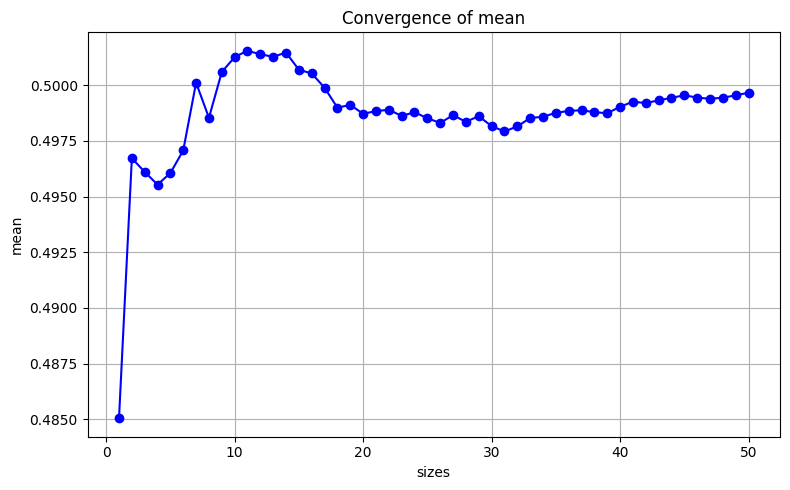

In [110]:
# Создаем фигуру и подграфики
fig, axs = plt.subplots(1, 1, figsize=(8, 5)) 

axs.plot(sizes, av_n[0, :], marker='o', color='b')
axs.set_title('Convergence of mean')
axs.set_xlabel('sizes')
axs.set_ylabel('mean')
axs.grid()


plt.tight_layout()
plt.savefig('2_3(mean).eps', format='eps')
plt.show()

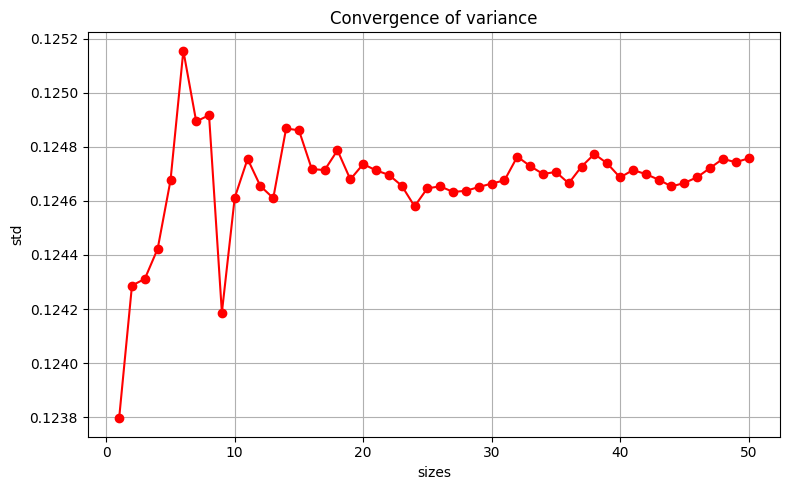

In [111]:

# Создаем фигуру и подграфики
fig, axs = plt.subplots(1, 1, figsize=(8, 5)) 

axs.plot(sizes, av_n[1, :], marker='o', color='r')
axs.set_title('Convergence of variance')
axs.set_xlabel('sizes')
axs.set_ylabel('std')
axs.grid()

plt.tight_layout()
plt.savefig('2_3(std).eps', format='eps')
plt.show()

### Task 3

#### Task 3.1

Случайная величина $X$ имеет экспоненциальное распределение с параметром $\lambda > 0$, если её функция плотности вероятности задана следующим образом:
$$
f_X(x) = 
\begin{cases} 
\lambda e^{-\lambda x}, & \text{если } x \geq 0, \\ 
0, & \text{иначе.} 
\end{cases}
$$


Функция распределения $F_X(x)$ для экспоненциальной случайной величины определяется как:
$$
F_X(x) = P(X \leq x) = 1 - e^{-\lambda x}, \quad x \geq 0
$$


Чтобы использовать метод обратного преобразования, необходимо найти обратную функцию к $F_X(x)$. Решим уравнение:

$$
u = F_X(x) = 1 - e^{-\lambda x}
$$

Решая относительно $x$, получаем:

$$
e^{-\lambda x} = 1 - u \implies -\lambda x = \ln(1 - u) \implies x = -\frac{1}{\lambda} \ln(1 - u)
$$

Таким образом, обратная функция имеет вид:

$$
F_X^{-1}(u) = -\frac{1}{\lambda} \ln(1 - u)
$$


$$X \sim Exp(\lambda)$$
Если случайная величина $X$ имеет экспоненциальное распределение с параметром $\lambda$, то согласно полученному ранее можно использовать выражение
$$
    X = - \frac{1}{\lambda} \ln{(1 - U)},
$$
где $U \sim U[0;1]$​ - равномерное распределние (можно заменить $1-U$ на $U$). \
Или же вместо равномерного распределения можно воспользоваться псевдослучайными числами

In [48]:
def exp_distr(lmbd, size):
    if lmbd < 0:
        raise Exception(f'This is not lambda, given {lmbd}, must be positive')
    if np.any(size < 0):
        raise Exception(f'Invalid size {size}')
    # np.random.rand?
    data_uniform = np.random.uniform(low=0, high=1, size=size)    
    exp_sample = - np.log(data_uniform) / lmbd
    return exp_sample

##### Check for lack of memory

In [51]:
shift = 2
N = 10**6
lmbd = 0.5
size = np.array([1, N])
exp_sample1 = exp_distr(lmbd, size)
exp_sample1 = exp_sample1[exp_sample1 >= shift]
exp_sample2 = exp_distr(lmbd, size)

sample_exp_1 = exp_sample1.flatten() - shift
sample_exp_2 = exp_sample2.flatten()


In [52]:
n_bins = 30
bins = np.arange(0, n_bins)

alpha = 0.01
xlim = np.floor(np.log(alpha) / np.log(1-lmbd)).astype(int)


In [53]:
exp_sample1.var()

4.010766494813753

In [54]:
L = 0.5
N = 10**5
sample_exponential = exp_distr(L, N)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


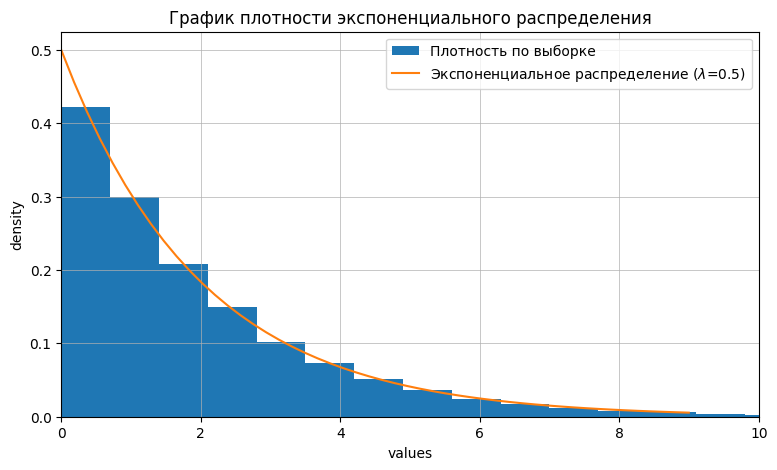

In [55]:
n_bins = 30

alpha = 0.01
xlim = np.ceil(-np.log(alpha)/L)

fig = plt.figure(figsize=(9,5))
ax = plt.axes()
ax.grid('minor', linewidth=0.5)
ax.set_xlim([0, xlim])

x = np.linspace(0, sample_exponential.max() * 3/7)
ax.hist(sample_exponential, 
    bins=n_bins,
    density=True, 
    label='Плотность по выборке'
)
ax.plot(x, L * np.exp(-L * x), label=f'Экспоненциальное распределение ($ \lambda$={lmbd})')

plt.title('График плотности экспоненциального распределения')
plt.ylabel('density')
plt.xlabel('values')
plt.legend()

plt.savefig('3_1(distr).eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


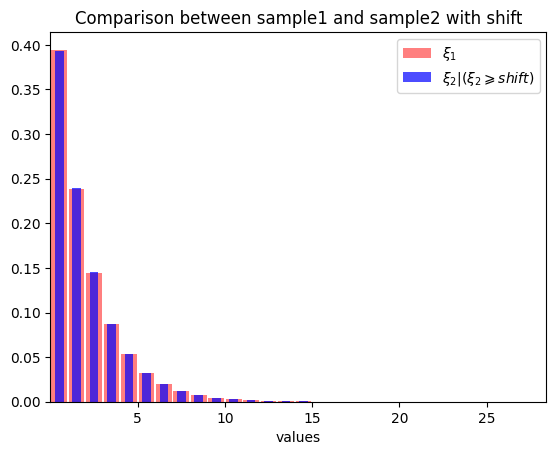

In [56]:
plt.hist(sample_exp_1, bins,
    density=True,
    rwidth=0.9,
    alpha=0.5,
    color='red',
    label='$\\xi_1$'
)
plt.hist(sample_exp_2, bins,
    density=True,
    rwidth=0.5,
    alpha=0.7,
    color='blue',
    label='$\\xi_2|(\\xi_2\\geqslant shift$)'
)

#plt.xlim([0, xlim]) # can be changed for less xlim
plt.xlim([np.minimum(sample_exp_1.min(), sample_exp_2.min()), np.minimum(sample_exp_1.max(), sample_exp_2.max())])

plt.title('Comparison between sample1 and sample2 with shift')
plt.ylabel('')
plt.xlabel('values')
plt.legend()

plt.savefig('3_1(memory).eps', format='eps')
plt.show()

#### Task 3.2

Пусть $X_1, X_2, \ldots, X_n$ — независимые экспоненциально распределенные случайные величины с параметрами $\lambda_1, \lambda_2, \ldots, \lambda_n$. Найдем распределение случайной величины $Y = \min(X_1, X_2, \ldots, X_n)$.

Сначала найдем функцию распределения для $Y$:

$$
F_Y(y) = P(Y \leq y) = P(\min(X_1, X_2, \ldots, X_n) \leq y).
$$


Это событие происходит, если каждая из случайных величин $X_i$ меньше или равна $y$. Таким образом:

$$
F_Y(y) = 1 - P(Y > y) = 1 - P(X_1 > y, X_2 > y, \ldots, X_n > y).
$$


Для экспоненциально распределенной случайной величины с параметром $\lambda_i$, вероятность того, что $X_i > y$, равна:

$$
P(X_i > y) = e^{-\lambda_i y}.
$$


Поскольку $X_1, X_2, \ldots, X_n$ независимы:

$$
P(X_1 > y, X_2 > y, \ldots, X_n > y) = P(X_1 > y) P(X_2 > y) \ldots P(X_n > y).
$$


Таким образом:

$$
P(X_1 > y, X_2 > y, \ldots, X_n > y) = e^{-\lambda_1 y} e^{-\lambda_2 y} \ldots e^{-\lambda_n y} = e^{-(\lambda_1 + \lambda_2 + \ldots + \lambda_n)y}.
$$


Теперь подставим это выражение обратно в функцию распределения $F_Y(y)$:

$$
F_Y(y) = 1 - P(Y > y) = 1 - e^{-(\lambda_1 + \lambda_2 + \ldots + \lambda_n)y}.
$$


Чтобы найти функцию плотности вероятности $f_Y(y)$, необходимо продифференцировать функцию распределения:

$$
f_Y(y) = \frac{d}{dy} F_Y(y) = (\lambda_1 + \lambda_2 + \ldots + \lambda_n)e^{-(\lambda_1 + \lambda_2 + \ldots + \lambda_n)y}.
$$


Таким образом, случайная величина $Y = \min(X_1, X_2, ..., X_n)$ также имеет экспоненциальное распределение с параметром:

$$
\lambda_Y = \lambda_1 + \lambda_2 + ... + \lambda_n.
$$


In [57]:
def gen_minimum_expo(lambdas, size):
    '''
    lmbds - vector of positive parameters of length n
    size = 
    '''
    n = len(lambdas)
    if type(size) is not np.ndarray:
        size = np.array(size)
    
    X = np.empty(np.concatenate(([n], size.flatten())))
    for k in range(n):
        X[k] = exp_distr(lambdas[k], size)
    
    return np.min(X, axis=0)

In [58]:
size = 1000
n = 100
lmbds = 7 * np.random.rand(n)

In [59]:
Y_sample_1 = gen_minimum_expo(lmbds, size)
Y_sample_2 = exp_distr(lmbds.sum(), size)

In [60]:
alpha = 0.01
xlim = -np.log(alpha)/lmbds.sum()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


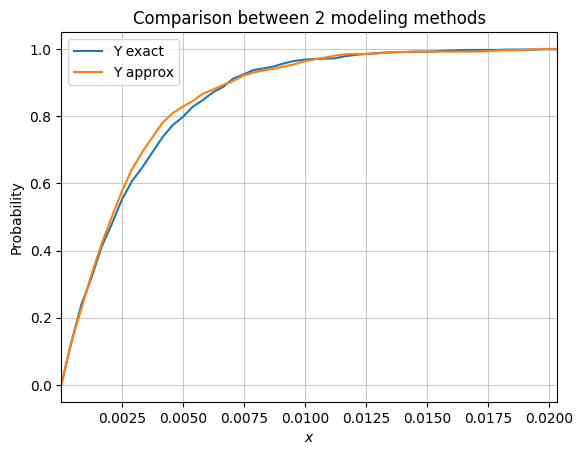

In [61]:
grid = np.linspace(0, max(Y_sample_1.max(), Y_sample_2.max()))
ecdf_expo_1 = EmpiricalDistributionFunction(Y_sample_1).ecdf(grid)
ecdf_expo_2 = EmpiricalDistributionFunction(Y_sample_2).ecdf(grid)
plt.plot(grid, ecdf_expo_1, label='Y exact')
plt.plot(grid, ecdf_expo_2, label='Y approx')

plt.ylabel('Probability')
plt.xlabel('$x$')
plt.grid('minor', linewidth=0.5)
#plt.xlim([0, xlim])
plt.xlim([min(Y_sample_1.min(), Y_sample_2.min()), max(Y_sample_1.max(), Y_sample_2.max())])
plt.legend()
plt.title('Comparison between 2 modeling methods')

plt.savefig('3_2.eps', format='eps')
plt.show()

#### Task 3.3


##### Лемма
Если $E_1, E_2, \ldots$ - i.i.d(независимые одинаково распределённые с.в.) экспоненциально распределённые случайные величины, и $X$ это наименьшее число, такое что:
$$
\sum_{i=1}^{X+1} E_i> 1
$$
тогда $X \sim Pois(\lambda)$.

Доказательство:
Пусть $f_k$ - плотность $(k)$-й случайной величины. Тогда,
$$
P(X \leq k)=P\left(\sum_{i=1}^{k+1} E_i> 1 \right)=\int_\lambda^{\infty} f_{k+1}(y) d y .
$$

Если $ E_1, E_2, \ldots, E_k $ — независимые экспоненциальные случайные величины с параметром $ \lambda $, то сумма:
$$
S_k = \sum_{i=1}^k E_i
$$
имеет гамма-распределение с параметрами $k$ и $\lambda$. Плотность вероятности этого распределения записывается как:
$$
f_k(y) = \frac{\lambda^k y^{k-1} e^{-\lambda y}}{(k-1)!}, \quad y > 0.
$$
Пользуясь этим, получаем
$$
\begin{aligned}
& P(X=k)=P(X \leq k)-P(X \leq k-1) \\
& =\int_\lambda^{\infty}\left(f_{k+1}(y)-f_k(y)\right) d y \\
& =\int_\lambda^{\infty}(y-k) \frac{y^{k-1}}{k!} e^{-y} d y \\
& =\frac{1}{k!} \int_\lambda^{\infty} d\left(-y^k e^{-y}\right) \\
& =e^{-\lambda} \frac{\lambda^k}{k!}
\end{aligned}
$$
Таким образом у нас есть способ моделирования Пуассоновского распределения через экспоненциальное.

In [5]:
def poisson_generator(lmbd, size):
    """
    Generates Poisson random variables using the exponential distribution.

    Args:
        lambda_: The rate parameter of the Poisson distribution.
        size: The number of samples to generate.

    Returns:
        A NumPy array of Poisson random variables.
    """
    if lmbd < 0:
        raise Exception(f'This is not lambda, given {lmbd}, must be positive')
    # Determine the maximum possible value for efficiency
    max_value = int(np.ceil(lmbd * 3))

    # Generate a matrix of exponentially distributed random variables
    exp_matrix = np.random.exponential(scale=1/lmbd, size=(max_value+1, size))

    # Calculate cumulative sums along each column
    cumsum_matrix = np.cumsum(exp_matrix, axis=0)

    # Find the first index where the cumulative sum exceeds 1 for each column
    indices = np.argmax(cumsum_matrix > 1, axis=0)

    return indices

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


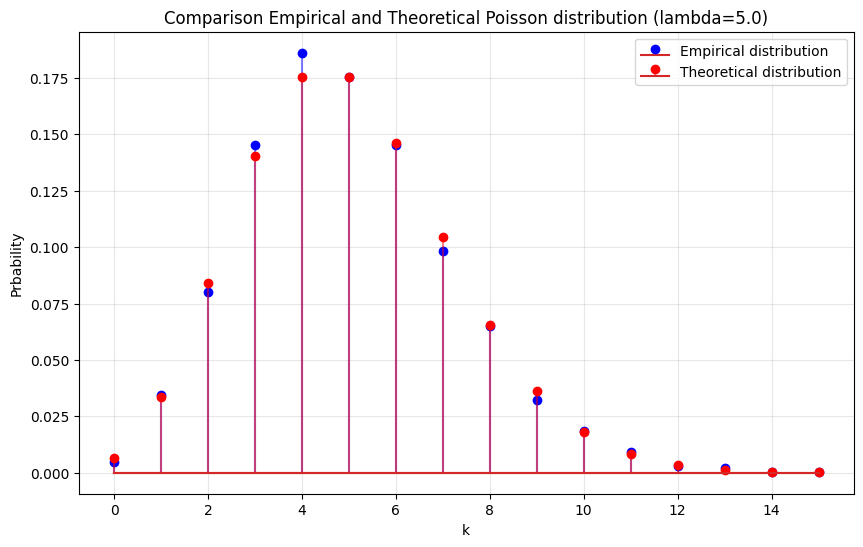

In [63]:
def poisson_exp_distr(lambda_, size):
    """
    Generates Poisson random variables using the exponential distribution.

    Args:
        lambda_: The rate parameter of the Poisson distribution (float or int).
        size: The number of samples to generate.

    Returns:
        A NumPy array of Poisson random variables.
    """
    if not isinstance(lambda_, (int, float)) or lambda_ <= 0:
        raise Exception(f'Lambda must be a positive number, given {lambda_}')
    
    # Determine the maximum possible value for efficiency
    # Using 4 sigma rule for better coverage
    max_value = int(np.ceil(lambda_ + 4 * np.sqrt(lambda_)))
    
    # Generate a matrix of exponentially distributed random variables
    exp_matrix = np.random.exponential(scale=1.0, size=(max_value + 1, size))
    
    # Scale the exponential variables by lambda
    exp_matrix = exp_matrix / lambda_
    
    # Calculate cumulative sums along each column
    cumsum_matrix = np.cumsum(exp_matrix, axis=0)
    
    # Find the first index where the cumulative sum exceeds 1 for each column
    indices = np.sum(cumsum_matrix <= 1, axis=0)
    
    return indices

def plot_poisson_distribution(lambda_, size, figsize=(10, 6)):
    """
    Generates and plots both empirical and theoretical Poisson distributions.
    
    Args:
        lambda_: The rate parameter of the Poisson distribution.
        size: The number of samples to generate.
        figsize: Figure size as tuple (width, height).
    """
    # Generate samples
    poisson_samples = poisson_generator(lambda_, size)
    
    # Calculate maximum k for plotting
    max_k = max(int(np.ceil(lambda_ + 4 * np.sqrt(lambda_))), np.max(poisson_samples))
    k = np.arange(0, max_k + 1)
    
    # Calculate theoretical probabilities
    poisson_probs = np.exp(-lambda_) * lambda_**k / factorial(k)
    
    # Calculate empirical probabilities
    hist, _ = np.histogram(poisson_samples, bins=np.arange(max_k + 2) - 0.5, density=True)
    
    plt.figure(figsize=figsize)
    _, stemlines1, _ = plt.stem(k, hist, linefmt='b-', markerfmt='bo', label='Empirical distribution')
    _, stemlines2, _ = plt.stem(k, poisson_probs, linefmt='r-', markerfmt='ro', label='Theoretical distribution')
    
    plt.setp(stemlines1, alpha=0.5)  # Прозрачность стеблей
    plt.setp(stemlines2, alpha=0.5)  # Прозрачность стеблей
    #plt.setp(markers, alpha=0.5)     # Прозрачность маркеров


    plt.xlabel('k')
    plt.ylabel('Prbability')
    plt.title(f'Comparison Empirical and Theoretical Poisson distribution (lambda={lambda_})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    return plt.gcf()

lambda_ = 5.0 
size = 10 ** 4  

plot_poisson_distribution(lambda_, size)
plt.savefig('3_3.eps', format='eps')

plt.show()

Как можно заметить уже на такой выборке графики почти идентичные

### Task 3.4

Теорема Пуассона \
Пусть есть последовательность серий испытаний Бернулли, где ${p_{n}}$ — вероятность «успеха», $\mu _{n}$ — количество «успехов».
$$
\lim_{n \to \infty} n p_n = \lambda ; \\
\lambda > 0, \\
\lim_{n \to \infty} P \bigl(\mu_n = m\bigr) = e^{-\lambda} \, \cfrac {\lambda^m} {m!} . \\
$$
Таким образом, получаем ещё один способ моделирования случайной величины с экспоненциальным распределением.

In [2]:
def poisson_bernoulli_distr(lambda_, size, n = 10 ** 4):
    """
    Генерирует случайные числа по распределению Пуассона с использованием схемы Бернулли.

    Args:
        n: Количество испытаний в одной серии.
        p: Вероятность успеха в одном испытании.
        size: Количество серий испытаний.

    Returns:
        Массив случайных чисел, распределенных по Пуассону.
    """
    if lambda_ <= 0:
        raise ValueError("Параметр lambda должен быть положительным")

    p = lambda_ / n

    return Bin_distr(n, p, size)


In [65]:
lambda_ = 5  
n = 10 ** 3
size = 10 ** 4  
poisson_samples = poisson_bernoulli_distr(lambda_, size)

print(poisson_samples.shape)

(10000,)


In [25]:
def poisson_chi2_test(poisson_generator=poisson_bernoulli_distr, lmbd=1, alpha=0.05):
    """
    Проверка генератора пуассоновского распределения методом χ²
    
    Параметры:
    - poisson_generator: функция генерации выборки
    - n: параметр n для генератора
    - p: параметр p для генератора
    - alpha: уровень значимости
    
    Возвращает:
    - Результаты теста \chi^2
    """
    size = 10 ** 4
    sample = poisson_generator(lmbd, size=size)
    val, counts = np.unique(sample, return_counts=True)
    p_i = lmbd * np.exp(-lmbd) / np.apply_along_axis(factorial, axis=0, arr=val)
    statistic = size * np.sum( (p_i - counts / size) ** 2 / p_i)
    
    df = len(val) - 2  # -2 из-за оценки параметров
    
    # Критическое значение
    critical_value = chi2.ppf(1 - alpha, df)
    
    # Принятие решения
    if critical_value > statistic:
        #print("\n Accept H0")
        return True
    else:
        #print("\n Decline H0")
        return False

In [21]:
result = poisson_chi2_test(poisson_bernoulli_distr, lmbd=1, alpha=0.05)
result

True

In [28]:
n_tests = 10 ** 2
test_results_Chi2 = np.zeros(n_tests)
for i in range(n_tests):
    test_results_Chi2[i]= poisson_chi2_test()
print(np.sum(test_results_Chi2) / n_tests)

KeyboardInterrupt: 

In [12]:
def poisson_graph(poisson_generator, lmbd=4):
    """
    Проверка генератора пуассоновского распределения методом χ²
    
    Параметры:
    - poisson_generator: функция генерации выборки
    - n: параметр n для генератора
    - p: параметр p для генератора
    - alpha: уровень значимости
    
    Возвращает:
    - Результаты теста \chi^2
    """
    # Генерация выборки
    size = 10 ** 4
    sample = poisson_generator(lmbd, size=size)
    val, counts = np.unique(sample, return_counts=True)
    
    prob = counts / size
    expected_freq = poisson.pmf(
        val, lmbd
    )

    # Визуализация
    plt.figure(figsize=(10, 6))
    plt.bar(val, prob, alpha=0.5, label='Выборка')
    plt.plot(val, expected_freq, 'r-', label='Ожидаемое распределение')
    plt.title('Comparison Empirical and Theoretical Poisson distribution')
    plt.xlabel('Число событий')
    plt.ylabel('Частота')
    plt.legend()
    plt.savefig('3_4.eps', format='eps')
    plt.show()
    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


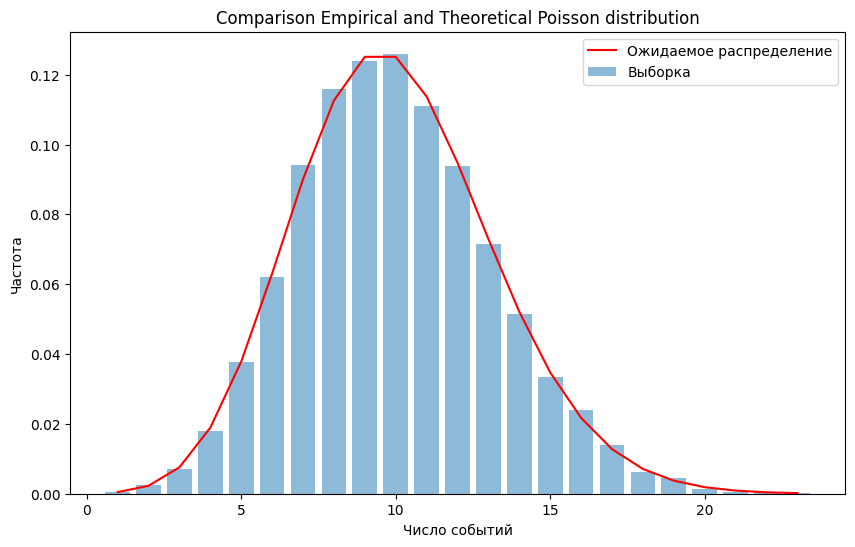

In [13]:
poisson_graph(poisson_bernoulli_distr, lmbd=10)

### Task 3.5

In [54]:

def box_muller_one(n):
    if n < 0:
        raise Exception(f'Invalid size {n}')
   
    U1 = np.random.rand(n)
    U2 = exp_distr(0.5, n)
    Z0 = np.sqrt(U2) * np.cos(2 * np.pi * U1)
    return Z0

def box_muller(n):
    if n < 0:
        raise Exception(f'Invalid size {n}')
   
    U1 = np.random.rand(n)
    U2 = exp_distr(0.5, n)
    Z0 = np.sqrt(U2) * np.cos(2 * np.pi * U1)
    Z1 = np.sqrt(U2) * np.sin(2 * np.pi * U1)
    return Z0, Z1


In [96]:
n_samples = 10**7
Z0, Z1 = box_muller(n_samples)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


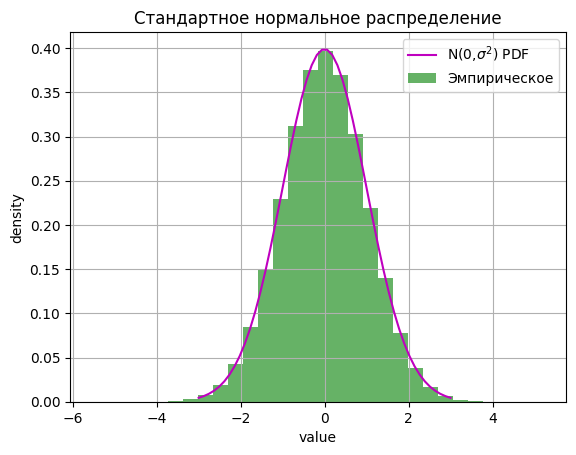

In [97]:

# Визуализация результатов
sigma = Z0.std()
grid = np.linspace(-3*sigma, 3*sigma)
plt.plot(grid, norm.pdf(grid, scale=sigma), color='m', label='N(0,$\sigma^2$) PDF')
plt.hist(Z0, bins=30, density=True, alpha=0.6, color='g', label='Эмпирическое')
#plt.hist(Z1, bins=30, density=True, alpha=0.6, color='r')
plt.title('Стандартное нормальное распределение')
plt.xlabel('value')
plt.ylabel('density')
plt.grid()
plt.legend()

plt.savefig('3_5(2).eps', format='eps')
plt.show()

Для проверки математических ожиданий нам потребуется двухвыборочный t-критерий для независимых выборок.
$$
    H_0 : M_1 = M_2.
$$


In [119]:
def stat_Student(sample1, sample2):
    """
    Calculates the t-statistic for two independent samples.

    Args:
        sample1: The first sample.
        sample2: The second sample.

    Returns:
        The calculated t-statistic.
    """
    sample_mean_1 = sample1.mean()
    sample_mean_2 = sample2.mean()
    sample_var_1 = sample1.var(ddof=1)  # ddof=1 for unbiased variance
    sample_var_2 = sample2.var(ddof=1)  # Corrected sample_var_2
    n1 = len(sample1)
    n2 = len(sample2)
    return (sample_mean_1 - sample_mean_2) / np.sqrt(sample_var_1 / n1 + sample_var_2 / n2)

def test_Student(sample1, sample2, alpha=0.05):
    """
    Performs a two-tailed Student's t-test for two independent samples.

    Args:
        sample1: The first sample.
        sample2: The second sample.
        alpha: Significance level (default: 0.05).

    Returns:
        A tuple containing:
            - True if the null hypothesis is rejected, False otherwise.
            - The p-value of the test.
    """
    # Calculate degrees of freedom using Welch's formula
    #df = ((np.var(sample1)/len(sample1) + np.var(sample2)/len(sample2))**2) / \
    #     (((np.var(sample1)/len(sample1))**2/(len(sample1)-1)) + ((np.var(sample2)/len(sample2))**2/(len(sample2)-1)))
    df = len(sample1) + len(sample2) -2

    quantile = t.ppf(1 - alpha/2, df)  # Corrected alpha/2 for two-tailed test
    stat = stat_Student(sample1, sample2)
    pvalue = t.sf(np.abs(stat), df) * 2 

    # Reject null hypothesis if |stat| > quantile
    #print(stat, quantile)
    return np.abs(stat) < quantile, pvalue

In [109]:

n_samples = 10**5
Z0, Z1 = box_muller(n_samples)
Z2, Z3 = box_muller(n_samples)

In [123]:
n_tests = 10 ** 3
test_results_Student = np.zeros(n_tests)
for i in range(n_tests):
    X = box_muller_one(n_samples)
    Y = box_muller_one(n_samples)
    test_results_Student[i], _ = test_Student(X, Y)
print(np.sum(test_results_Student) / n_tests)

0.962


In [105]:

# Генерация двух выборок
X = Z0[:5000]  # Первая половина Z0
Y = Z1[:5000]  # Первая половина Z1

# t-критерий для независимых выборок
t_statistic, p_value = test_Student(X, Y)

print(f't-статистика: {t_statistic}, p-value: {p_value}')

t-статистика: False, p-value: 0.8500568018564598


In [ ]:

t_statistic, p_value = test_Student(Z1, Z2)

print(f't-статистика: {t_statistic}, p-value: {p_value}')

t-статистика: True, p-value: 0.10108772004010134


Таким образом мы получили, что у данных выборок действительно совпадает математическое ожидание

In [125]:
def stat_Fisher(sample1, sample2):
    sample_var_1 = sample1.var()
    sample_var_2 = sample2.var()
    return sample_var_1 / sample_var_2

def F_test(sample1, sample2, alpha=0.05):
    df1 = len(sample1) - 1
    df2 = len(sample1) - 2
    quantile = f.ppf(1 - alpha / 2, df1, df2)
    stat = stat_Fisher(sample1, sample2)
    pvalue = f.sf(np.abs(stat), df1, df2) * 2 # two-tailed critical region, so we multiply by "2"
    return np.abs(stat) < quantile, pvalue

In [129]:

n_samples = 10**5
Z4, Z5 = box_muller(n_samples)
Z6, Z7 = box_muller(n_samples)

In [130]:

f_statistic, p_value = test_Student(Z4, Z7)

print(f'F-статистика: {f_statistic}, p-value: {p_value}')

F-статистика: True, p-value: 0.6474202010463026


In [134]:
n_tests = 10 ** 3
test_results_Student = np.zeros(n_tests)
for i in range(n_tests):
    X = box_muller_one(n_samples)
    Y = box_muller_one(n_samples)
    test_results_Student[i], _ = F_test(X, Y, alpha=0.1)
print(np.sum(test_results_Student) / n_tests)

0.956


Таким образом получили равенство дисперсий

### Task 4

#### Task 4.1


Распределение Коши имеет функцию плотности вероятности:
$$
\begin{equation}
f(x) = \frac{1}{\pi\gamma[1 + (\gamma^{-1} (x-x_0))^2]},
\end{equation}
$$
где $x_0$ - параметр положения, $\gamma$ - параметр масштаба.

Для генерации случайных чисел с распределением Коши используем метод обратного преобразования. \
Найдём функцию распределения $F(x)$, интегрируя плотность:
$$
    F(x) = \frac{1}{\pi}\arctan(\frac{x-x_0}{\gamma}) + \frac{1}{2}
$$

Найдём обратную функцию $F^{-1}(p)$:
$$
    F^{-1}(p) = x_0 + \gamma\tan(\pi(p-\frac{1}{2}))
$$
где $p \in (0,1)$

Для генерации случайной величины с распределением Коши: \
Генерируем $u \sim U(0,1)$ (равномерное распределение) 
$$
    X = x_0 + \gamma\tan(\pi(u-\frac{1}{2}))
$$
    

In [29]:
def cauchy_distr(size=1000, x0=0, gamma=1):
    """
    Генерирует случайные числа с распределением Коши используя метод обратной функции
    
    Параметры:
    size (int): количество генерируемых чисел
    x0 (float): параметр положения (location parameter)
    gamma (float): параметр масштаба (scale parameter)
    
    Возвращает:
    numpy.ndarray: массив случайных чисел с распределением Коши
    """
    
    # Генерируем равномерно распределенные числа на интервале (0,1)
    u = np.random.uniform(0, 1, size)
    
    # Применяем обратную функцию распределения Коши:
    # F^(-1)(p) = x0 + gamma * tan(pi * (p - 0.5))
    cauchy = x0 + gamma * np.tan(np.pi * (u - 0.5))
    
    return cauchy

def cauchy_density(x, x0=0, gamma=1):
    return 1 / (np.pi * gamma * (1 + ((x - x0) / gamma)**2))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


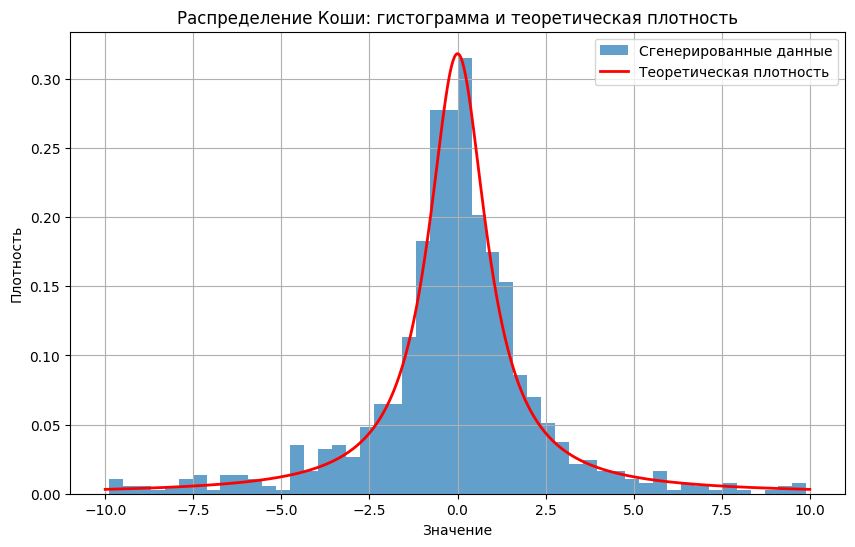

In [31]:
size = 10**3
samples = cauchy_distr(size)

plt.figure(figsize=(10, 6))

# Построение гистограммы
plt.hist(samples[np.abs(samples) < 10], bins=50, density=True, alpha=0.7, label='Сгенерированные данные')

# Построение теоретической плотности вероятности
x = np.linspace(-10, 10, 1000)
pdf = cauchy_density(x)
plt.plot(x, pdf, 'r-', lw=2, label='Теоретическая плотность')

plt.title('Распределение Коши: гистограмма и теоретическая плотность')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.savefig('4_1.eps', format='eps')

plt.show()

Метод отбора с отвержением (Метод фон Неймана) является одним из основных методов генерации выборок из сложного распределения, когда прямая генерация выборок затруднительна. Этот метод основан на использовании более простого распределения для генерации кандидатных выборок и их последующего принятия или отклонения на основе определенного критерия.


1. Пусть у нас есть целевое распределение(нормальное в нашем случае) с плотностью вероятности $ f(x) $, из которого мы хотим получить выборки.

2. Выбираем простое распределение(распределение Коши) $g(x)$, из которого легко генерировать выборки. Это распределение должно охватывать область значений целевого распределения(оба распределения определены $\forall x \in \mathbb{R}$).

3. Находим константу $ M $, такую что:
   $$
   f(x) \leq M \cdot g(x),~ \forall x.
   $$
   Эта константа позволяет масштабировать предложенное распределение так, чтобы оно "покрывало" целевое.


Алгоритм можно описать следующими шагами:

   1. Генерируем случайное значение $ X $ из предложенного распределения $ g(x) $.
   2. Генерируем случайное значение $ U $ из равномерного распределения на интервале [0, 1].
   3. Принимаем значение $ X $, если выполняется условие:
   $$
   U \leq \frac{f(X)}{M \cdot g(X)}
   $$
   В противном случае отвергаем $ X $ и повторяем процесс.

Для обоих распределений максимум находится в нуле. 
$$
   f(0) = \frac{1}{\sqrt{2 \pi} },~ g(0) = \frac{1}{\pi} \\
   M = \sqrt{ \frac{\pi}{2}}
$$


In [32]:
def normal_pdf(x, mu=0, sigma=1):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def cauchy_pdf(x, x0=0, gamma=1):
    return (1 / (np.pi * gamma * (1 + ((x - x0) / gamma) ** 2)))

def rejection_sampling(n_samples):
    samples = []
    M = np.sqrt(np.pi / 2)

    while len(samples) < n_samples:
        x = cauchy_distr(1)
        u = np.random.uniform(0, 1)

        # Условие принятия
        if u <= normal_pdf(x) / (M * cauchy_pdf(x)):
            samples.append(x)

    return np.squeeze(np.array(samples))

In [33]:
n_samples = 10**5

samples = rejection_sampling(n_samples)

In [ ]:
samples.shape

(100000,)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


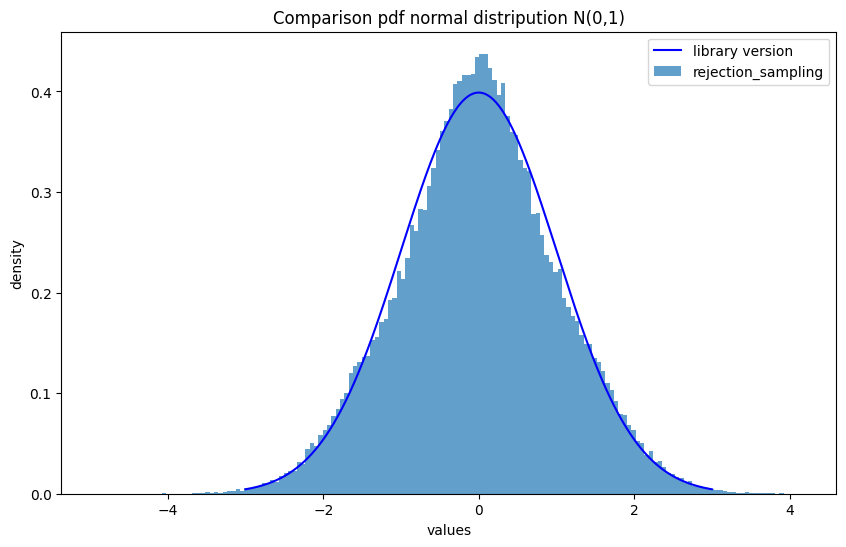

In [35]:
# Генерируем значения x
x = np.linspace(-3, 3, 1000)

# Вычисляем плотность вероятности для нормального распределения
y = norm.pdf(x, 0, 1)

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue', label='library version')


plt.hist(samples, bins='auto', density=True, alpha=0.7, label='rejection_sampling'
)

plt.xlabel('values')
plt.ylabel('density')
plt.title('Comparison pdf normal distripution N(0,1)')
plt.legend()
plt.savefig('4_1(1).eps', format='eps')

plt.show()

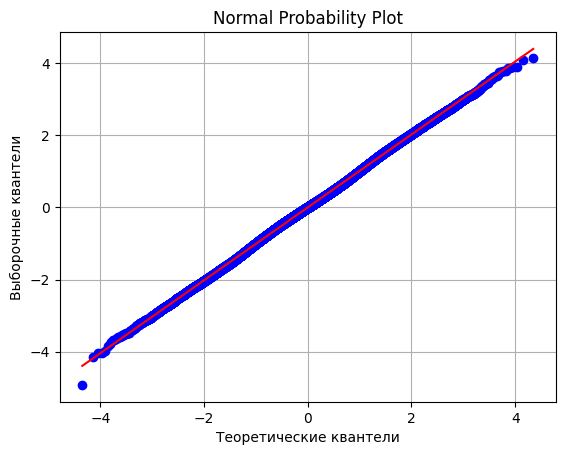

In [36]:

probplot(samples, dist="norm", plot=plt)

plt.title('Normal Probability Plot')
plt.xlabel('Теоретические квантели')
plt.ylabel('Выборочные квантели')
plt.grid()

plt.savefig('4_2.eps', format='eps')
plt.show()

Normal Probability Plot (Q-Q plot) задается следующим образом:

    По оси Y откладываются упорядоченные значения выборки 
    По оси X откладываются теоретические квантили стандартного нормального распределения 
    Если данные близки к нормальному распределению, точки будут располагаться вдоль прямой линии 

График линеен для $N(\mu, \sigma^2)$ потому что:

Если $X \sim N(\mu, \sigma^2)$, то $X = \mu + \sigma Z$, где $Z \sim N(0,1)$
Это линейное преобразование сохраняет линейность графика \
    Наклон прямой равен $\sigma$ (стандартному отклонению), \ 
    Сдвиг прямой равен $\mu$ (математическому ожиданию).

Для других распределений график нелинеен потому что: 

Квантили этих распределений не связаны линейным преобразованием с квантилями нормального распределения \
Форма распределения отличается от нормального, что отражается в нелинейности графика.


График будет инвариантен для распределений из семейства местоположения-масштаба(Location-scale family): \
В данном семействе выполняется замкнутость относительно линейных преобразований \
В данное семейство входят: распределения Коши, t-распределения Стьюдента, и равномерное распределение

In [41]:
def create_qq_plot(data, dist_name, ax=None, color='blue', alpha=0.5):
    """
    Создает Q-Q plot для заданных данных
    
    data : array-like(np.ndarray, например)
        Данные для анализа
    dist_name : str
        Название распределения для заголовка
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    # Создаем Q-Q plot
    probplot(data, dist="norm", plot=ax)
    
    # Настраиваем оформление
    ax.set_title(f'Q-Q Plot for {dist_name}')
    ax.get_lines()[0].set_markerfacecolor(color)
    ax.get_lines()[0].set_alpha(alpha)
    
    return ax

def demonstrate_qq_properties(n_samples=1000):
    """
    Демонстрирует свойства Q-Q plot для разных распределений
    """
    #np.random.seed(42)
    
    normal_std = np.random.normal(0, 1, n_samples)
    
    # 2. Нормальное с параметрами N(5, 4)
    normal_shifted = np.random.normal(5, 2, n_samples)
    
    # 3. Распределение Коши
    sample_cauchy = np.random.standard_cauchy(n_samples)
    
    # 4. Экспоненциальное распределение
    exponential = np.random.exponential(2, n_samples)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))
    
    create_qq_plot(normal_std, 'N(0,1)', axes[0,0], 'blue')
    create_qq_plot(normal_shifted, 'N(5,4)', axes[0,1], 'green')
    create_qq_plot(sample_cauchy, 'Cauchy', axes[1,0], 'red')
    create_qq_plot(exponential, 'Exp', axes[1,1], 'purple')
    
    plt.tight_layout()
    fig.savefig('4_2(2).eps', format='eps')
    plt.show()
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Создаем данные с разными параметрами масштаба и сдвига
    shifts = [0, 2, 5]
    scales = [1, 2, 3]
    
    # Для нормального распределения
    for mu, sigma in zip(shifts, scales):
        data = np.random.normal(mu, sigma, n_samples)
        create_qq_plot(data, f'N({mu},{sigma^2}) ', axes[0], 
                      color=np.random.rand(3), alpha=0.3)
    axes[0].set_title('Q-Q Plot for different N(\mu,\sigma^2)')
    
    # Для распределения Коши
    for loc, scale in zip(shifts, scales):
        data = cauchy.rvs(loc=loc, scale=scale, size=n_samples)
        create_qq_plot(data, f'Коши(loc={loc},scale={scale})', axes[1],
                      color=np.random.rand(3), alpha=0.3)
    axes[1].set_title('Q-Q Plot for different Cauchy(loc,scale)')
    
    plt.tight_layout()

    fig.savefig('4_2(3).eps', format='eps')
    plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


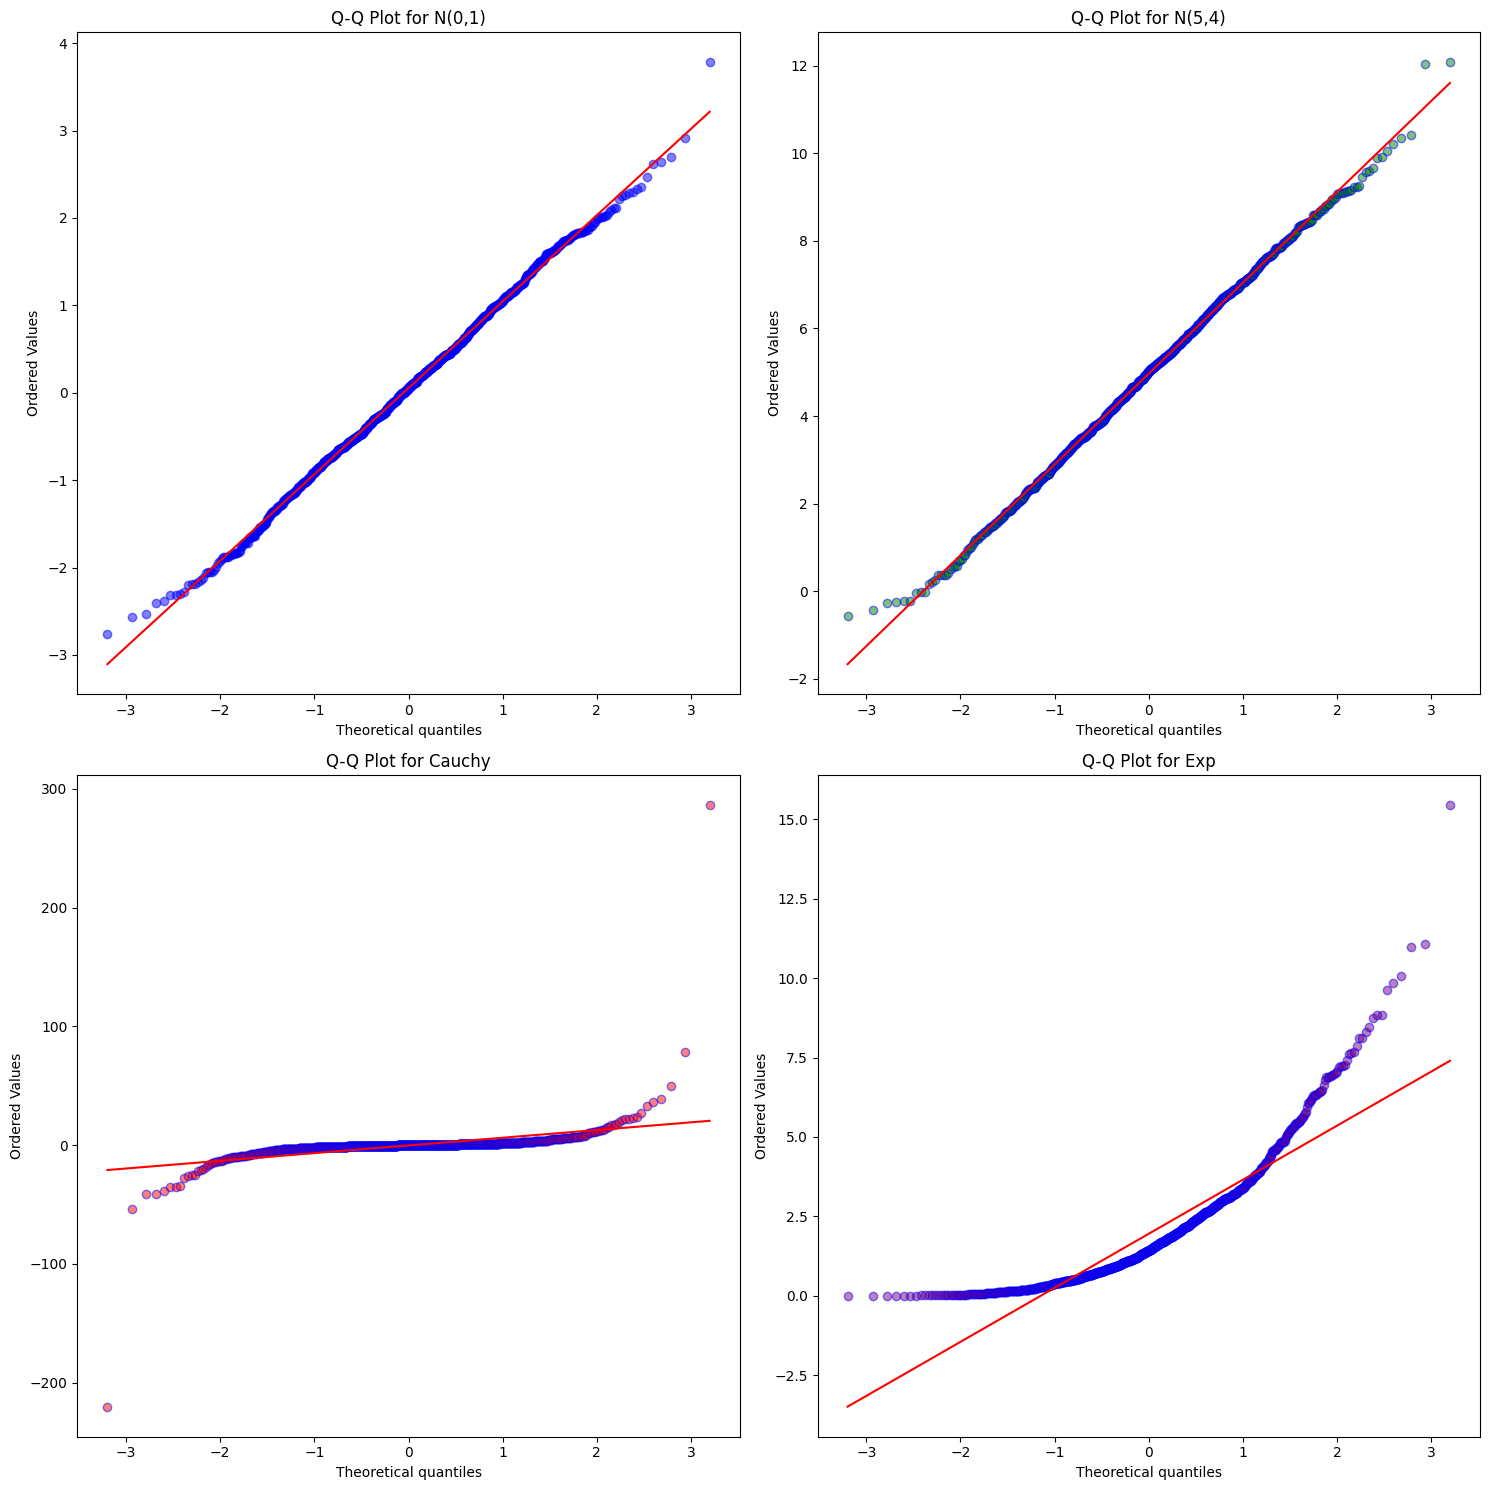

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


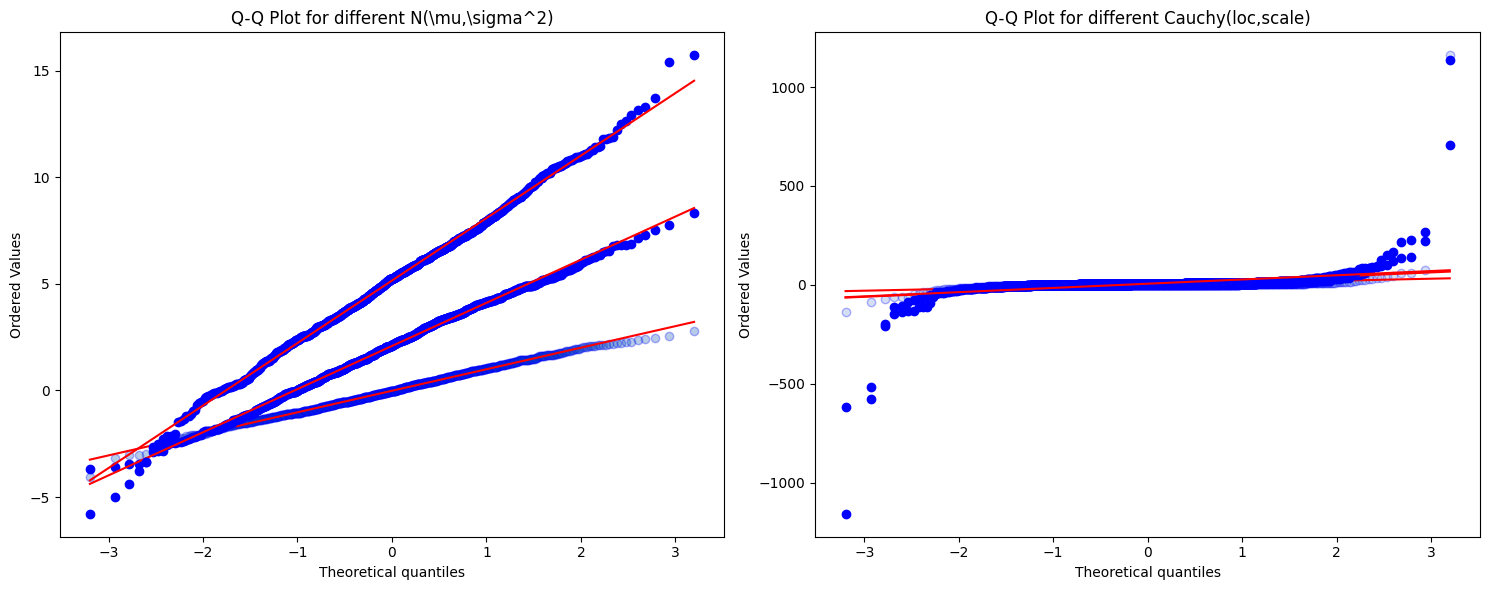

In [42]:
# Запускаем демонстрацию свойств для различных распределений, тут воспользовался библиотечными версиями датчиков
demonstrate_qq_properties()

#### Task 4.3


Средние значения времени выполнения:
sample_size    100       1000      10000     100000
method                                             
Box-Muller   0.000045  0.000073  0.000406  0.004140
Rejection    0.002309  0.018639  0.186711  1.828483


ValueError: List of boxplot statistics and `positions` values must have same the length

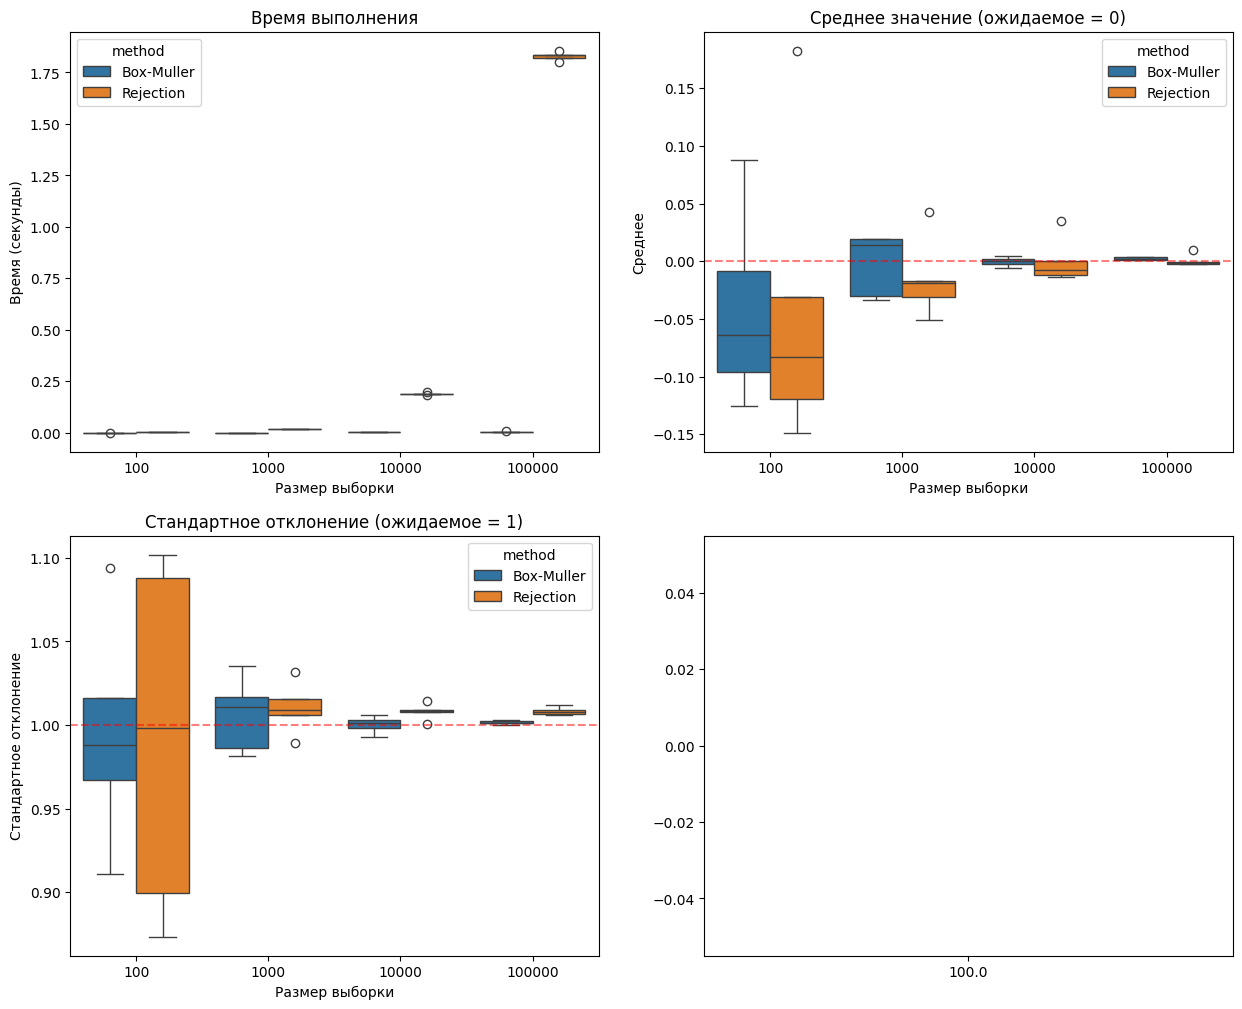

In [49]:
import time
from functools import wraps
import seaborn as sns
from typing import Callable, List, Tuple
import pandas as pd

def timing_decorator(func: Callable) -> Callable:
    """
    Декоратор для измерения времени выполнения функции
    
    Parameters:
    -----------
    func : Callable
        Функция для измерения времени выполнения
        
    Returns:
    --------
    Callable
        Обёрнутая функция, возвращающая результат и время выполнения
    """
    @wraps(func)
    def wrapper(*args, **kwargs) -> Tuple[np.ndarray, float]:
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        execution_time = end_time - start_time
        return result, execution_time
    return wrapper

@timing_decorator
def box_muller_dec(n):
    if n < 0:
        raise Exception(f'Invalid size {n}')
   
    U1 = np.random.rand(n)
    U2 = exp_distr(0.5, n)
    Z0 = np.sqrt(U2) * np.cos(2 * np.pi * U1)
    Z1 = np.sqrt(U2) * np.sin(2 * np.pi * U1)
    return Z0, Z1

@timing_decorator
def rejection_sampling_dec(n_samples):
    samples = []
    M = np.sqrt(np.pi / 2)

    while len(samples) < n_samples:
        x = cauchy_distr(1)
        u = np.random.uniform(0, 1)

        # Условие принятия
        if u <= normal_pdf(x, 0, 1) / (M * cauchy_pdf(x, 0, 1)):
            samples.append(x)

    return np.squeeze(np.array(samples))


def compare_methods(sample_sizes, n_repeats: int = 5) -> pd.DataFrame:
    """
    Сравнение методов генерации по времени выполнения и точности
    
    Parameters:
    sample_sizes : 
        Список размеров выборок для тестирования
    n_repeats : int
        Количество повторений для каждого размера выборки
        
    Returns:
    pd.DataFrame
        Датафрейм с результатами сравнения
    """
    results = []
    
    for n in sample_sizes:
        for _ in range(n_repeats):
            # Box-Muller
            samples_bm, time_bm = box_muller_dec(n)
            stats_bm = {
                'mean': np.mean(samples_bm),
                'std': np.std(samples_bm)
            }
            
            # Rejection sampling
            samples_rs, time_rs = rejection_sampling_dec(n)
            stats_rs = {
                'mean': np.mean(samples_rs),
                'std': np.std(samples_rs)
            }
            
            results.append({
                'method': 'Box-Muller',
                'sample_size': n,
                'time': time_bm,
                'mean': stats_bm['mean'],
                'std': stats_bm['std']
            })
            
            results.append({
                'method': 'Rejection',
                'sample_size': n,
                'time': time_rs,
                'mean': stats_rs['mean'],
                'std': stats_rs['std']
            })
    
    return pd.DataFrame(results)

def visualize_comparison(results: pd.DataFrame):
    """
    Визуализация результатов сравнения методов
    
    Parameters:
    -----------
    results : pd.DataFrame
        Датафрейм с результатами сравнения
    """
    # Создаем сетку графиков
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. График времени выполнения
    sns.boxplot(data=results, x='sample_size', y='time', hue='method', ax=ax1)
    ax1.set_title('Время выполнения')
    ax1.set_ylabel('Время (секунды)')
    ax1.set_xlabel('Размер выборки')
    
    # 2. График среднего значения
    sns.boxplot(data=results, x='sample_size', y='mean', hue='method', ax=ax2)
    ax2.axhline(y=0, color='r', linestyle='--', alpha=0.5)
    ax2.set_title('Среднее значение (ожидаемое = 0)')
    ax2.set_ylabel('Среднее')
    ax2.set_xlabel('Размер выборки')
    
    # 3. График стандартного отклонения
    sns.boxplot(data=results, x='sample_size', y='std', hue='method', ax=ax3)
    ax3.axhline(y=1, color='r', linestyle='--', alpha=0.5)
    ax3.set_title('Стандартное отклонение (ожидаемое = 1)')
    ax3.set_ylabel('Стандартное отклонение')
    ax3.set_xlabel('Размер выборки')
    
    # 4. График отношения времени выполнения
    time_ratio = results.pivot(columns='method', values='time')
    ratio = time_ratio['Rejection'] / time_ratio['Box-Muller']
    sns.boxplot(data=pd.DataFrame({'ratio': ratio, 'sample_size': results[results['method'] == 'Box-Muller']['sample_size']}),
                x='sample_size', y='ratio', ax=ax4)
    ax4.axhline(y=1, color='r', linestyle='--', alpha=0.5)
    ax4.set_title('Отношение времени (Rejection/Box-Muller)')
    ax4.set_ylabel('Отношение')
    ax4.set_xlabel('Размер выборки')
    
    plt.tight_layout()
    plt.show()

# Проведем сравнение
sample_sizes = [10 ** 2, 10 ** 3, 10 ** 4, 10 ** 5]
results = compare_methods(sample_sizes)

# Выведем сводную статистику
print("\nСредние значения времени выполнения:")
print(results.groupby(['method', 'sample_size'])['time'].mean().unstack())

# Визуализируем результаты
visualize_comparison(results)

In [50]:
def visualize_comparison(results: pd.DataFrame):
    """
    Визуализация результатов сравнения методов
    """
    # Создаем сетку графиков
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. График времени выполнения
    methods = ['Box-Muller', 'Rejection']
    colors = ['blue', 'orange']
    
    # Используем обычный график для времени выполнения
    for method, color in zip(methods, colors):
        method_data = results[results['method'] == method]
        means = method_data.groupby('sample_size')['time'].mean()
        std = method_data.groupby('sample_size')['time'].std()
        
        ax1.plot(means.index, means.values, 'o-', label=method, color=color)
        ax1.fill_between(means.index, 
                        means.values - std.values,
                        means.values + std.values,
                        alpha=0.2,
                        color=color)
    
    ax1.set_title('Time of work')
    ax1.set_ylabel('Time')
    ax1.set_xlabel('sample size')
    ax1.legend()
    ax1.set_xscale('log')  # Логарифмическая шкала для размера выборки
    ax1.grid(True)
    
    # 2. График среднего значения
    # Подготовка данных для boxplot
    box_data_mean = [results[results['method'] == method]['mean'].values 
                    for method in methods]
    
    ax2.boxplot(box_data_mean, labels=methods)
    ax2.axhline(y=0, color='r', linestyle='--', alpha=0.5)
    ax2.set_title('mean (expected = 0)')
    ax2.set_ylabel('mean')
    ax2.grid(True)
    
    # 3. График стандартного отклонения
    box_data_std = [results[results['method'] == method]['std'].values 
                   for method in methods]
    
    ax3.boxplot(box_data_std, labels=methods)
    ax3.axhline(y=1, color='r', linestyle='--', alpha=0.5)
    ax3.set_title('std (expected = 1)')
    ax3.set_ylabel('std')
    ax3.grid(True)
    
    # 4. График отношения времени выполнения
    ratios = []
    sizes = []
    for size in results['sample_size'].unique():
        size_data = results[results['sample_size'] == size]
        bm_times = size_data[size_data['method'] == 'Box-Muller']['time'].values
        rej_times = size_data[size_data['method'] == 'Rejection']['time'].values
        
        # Используем среднее время для каждого метода при данном размере выборки
        ratio = np.mean(rej_times) / np.mean(bm_times)
        ratios.append(ratio)
        sizes.append(size)
    
    ax4.plot(sizes, ratios, 'o-', color='purple')
    ax4.axhline(y=1, color='r', linestyle='--', alpha=0.5)
    ax4.set_title('time ratio (Rejection/Box-Muller)')
    ax4.set_ylabel('ratio')
    ax4.set_xlabel('sample size')
    ax4.set_xscale('log')  # Логарифмическая шкала для размера выборки
    ax4.grid(True)
    
    plt.tight_layout()

    fig.savefig('4_3.eps', format='eps')
    plt.show()


Средние значения времени выполнения:
sample_size    100       1000      10000     100000
method                                             
Box-Muller   0.000077  0.000070  0.000402  0.003756
Rejection    0.002492  0.018029  0.177223  1.798330


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


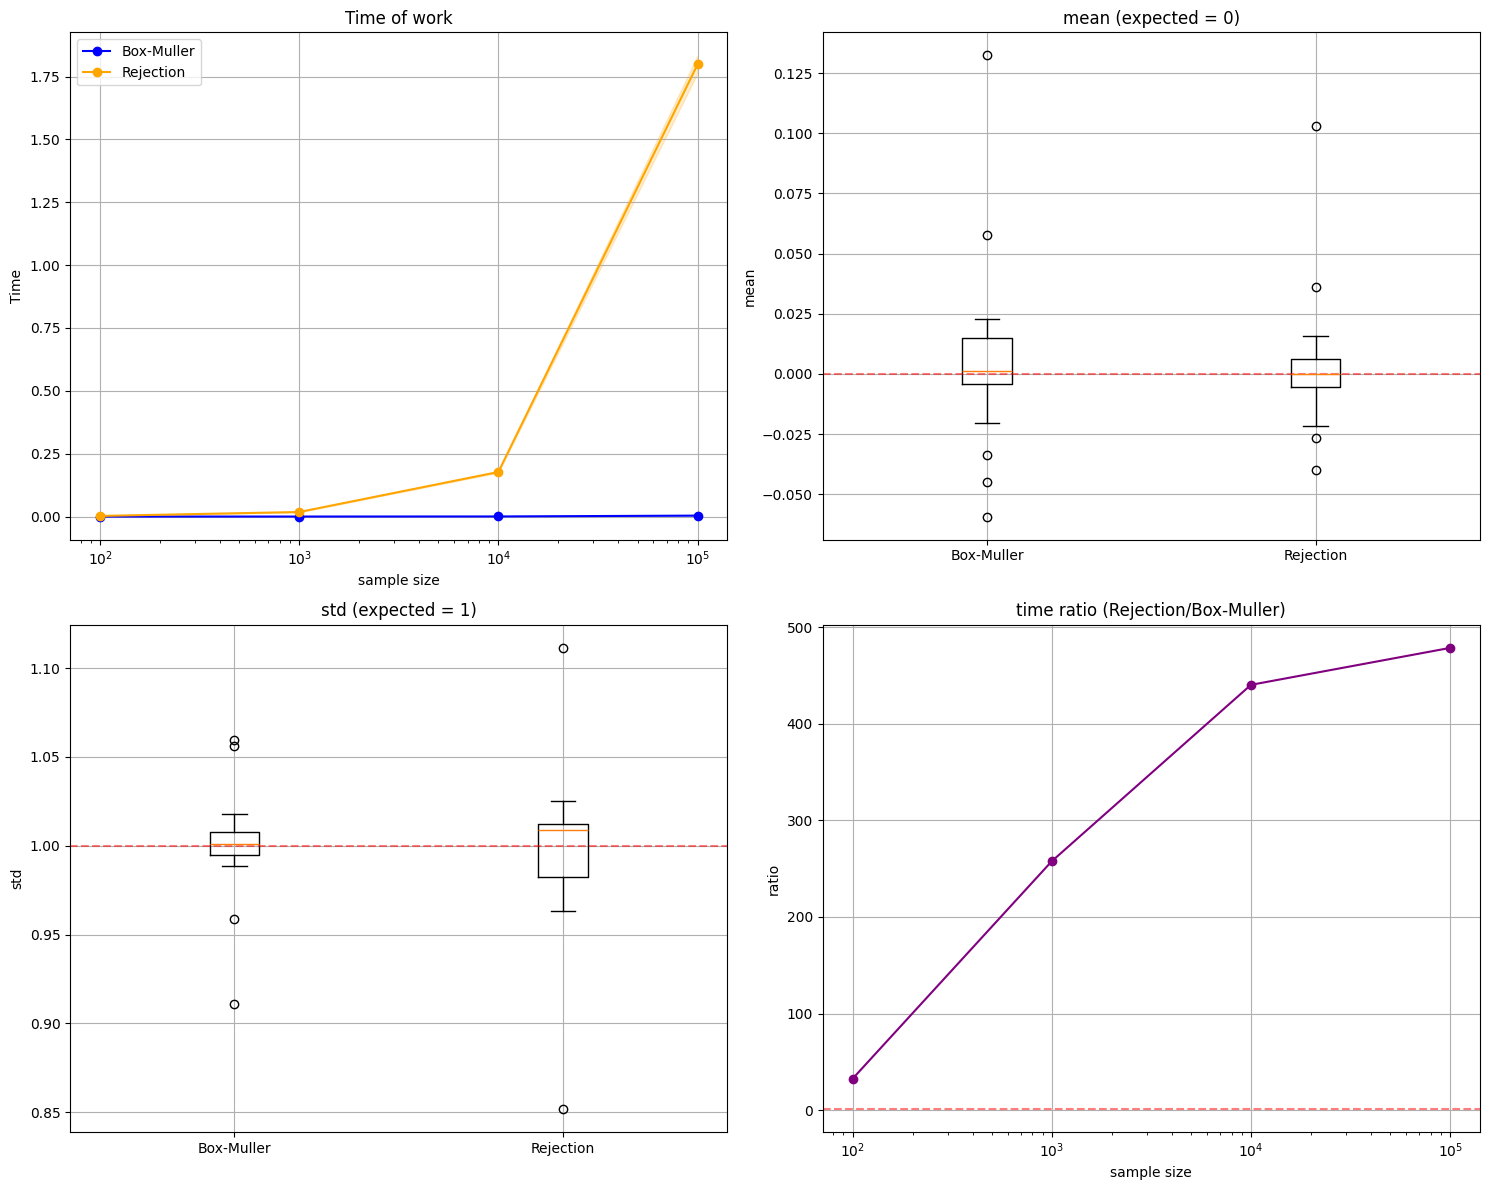

In [51]:
# Проведем сравнение
sample_sizes = [10 ** 2, 10 ** 3, 10 ** 4, 10 ** 5]
results = compare_methods(sample_sizes)

# Выведем сводную статистику (опционально)
print("\nСредние значения времени выполнения:")
print(results.groupby(['method', 'sample_size'])['time'].mean().unstack())

# Визуализируем результаты
visualize_comparison(results)

Эти графики позволяют сделать вывод, что метод Бокса-Мюллера значительно эффективнее по времени выполнения, особенно для больших выборок, при этом оба метода дают схожую точность генерации нормального распределения.

### Task 5

In [56]:
# Функция для проверки закона больших чисел
def check_law_of_large_numbers(X, mu):
    n = len(X)
    sample_means = np.cumsum(X) / np.arange(1, n + 1)
    
    # Визуализация ЗБЧ
    plt.plot(sample_means, label="Кумулятивное среднее")
    plt.axhline(y=mu, color="r", linestyle="--", label=f"Истинное значение µ = {mu}")
    plt.xlabel("Число наблюдений")
    plt.ylabel("Среднее значение")
    plt.title("Проверка закона больших чисел (ЗБЧ)")
    plt.legend()

    plt.savefig('5_1.eps', format='eps')
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


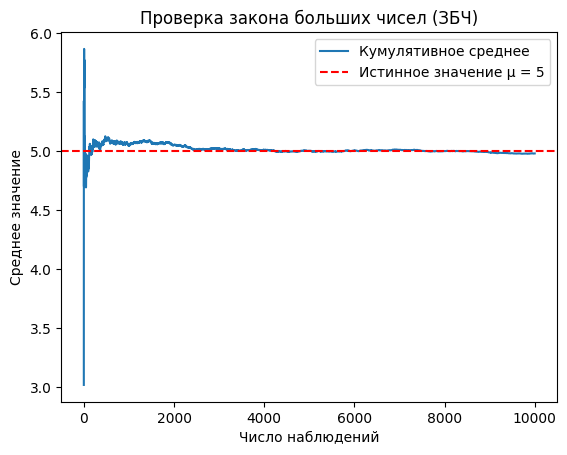

In [57]:
mu, sigma = 5, 2 
n = 10 ** 4  

np.random.seed(42)
Z0 = box_muller_one(n)
X = Z0 * sigma + mu

check_law_of_large_numbers(X, mu)


In [58]:
def gen_norm_sum(n_elements, loc=0.0, scale=1.0, n_points=1):
    """
    Sum of normal random values using matrix operations
    
    Parameters:
    n_elements - number of elements in sum
    loc - shift parameter (mu)
    scale - scale paramter (sigma)
    n_points - length of output vector
    
    Returns:
    Vector of length n_points containing sums of normal random values
    """
    # Input validation
    if n_points <= 0:
        raise Exception(f'Invalid n_points {n_points}')
    if n_elements <= 0:
        raise Exception(f'Invalid n_elements {n_elements}')
        
    # Generate all random values at once using matrix multiplication
    # Shape will be (n_elements, n_points)
    Z0 = box_muller_one(n_elements * n_points)
    random_matrix = (loc + scale * Z0).reshape(n_elements, n_points)
    
    # Sum along axis 0 (sum each column) and apply scaling
    return np.sum(random_matrix, axis=0)

In [63]:
def check_central_limit_theorem(X, mu, sigma):
    n_elements = len(X)
    grid = np.linspace(-3*sigma, 3*sigma)

    plt.figure(figsize=(9,5))

    plt.hist((X / n_elements - mu) * np.sqrt(n_elements),
        bins='auto',
        rwidth=0.9,
        density=True,
        color='c',
        label='Modelated dist'
    )

    plt.plot(grid, norm.pdf(grid, scale=sigma), color='m', label='N(0,$\sigma^2$) PDF')

    plt.grid('minor', linewidth=0.5)
    plt.ylabel('density')
    plt.xlabel('values')
    plt.title(f'Comparison density of normalized sum of normal random values, $\sigma={sigma}$')
    plt.legend()

    plt.savefig('5_1(1).eps', format='eps')
    plt.show()


In [64]:
n_elements = 10**4

In [65]:
n_points = 10**4
mu = 1
sigma = 2
sample_norm_sum = gen_norm_sum(n_elements, mu, sigma, n_points)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


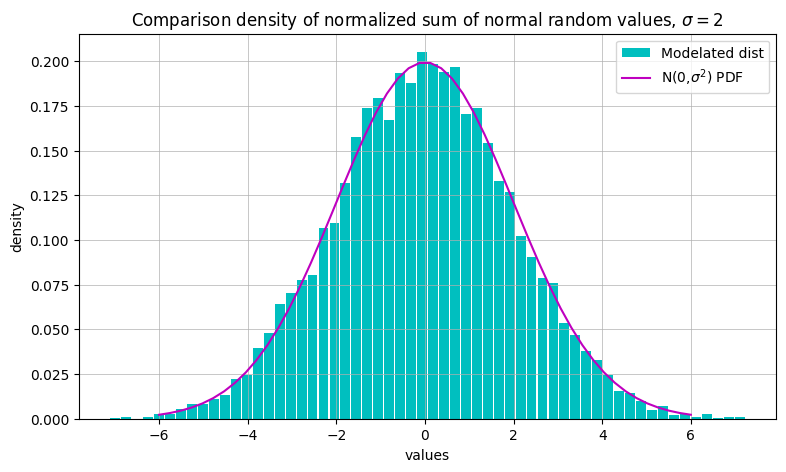

In [66]:
check_central_limit_theorem(sample_norm_sum, mu, sigma)

#### Task 5.2

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

def calculate_confidence_intervals_vectorized(X, alpha=0.05):
    """
    Векторизованная версия функции для расчета доверительных интервалов.
    """
    n = len(X)
    indices = np.arange(1, n + 1)
    
    # Средние
    means = np.cumsum(X) / indices

    sum_X_squared = np.cumsum(X ** 2)
    variance = (sum_X_squared - indices * means ** 2) / (indices)
    stds = np.sqrt(variance)
    
    # Квантиль нормального распределения
    z_critical = norm.ppf(1 - alpha / 2)
    
    # Квантили хи-квадрат распределения
    df = indices - 1
    chi2_lower = chi2.ppf(alpha / 2, df=df)
    chi2_upper = chi2.ppf(1 - alpha / 2, df=df)
    
    # Доверительный интервал для среднего
    ci_mean_lower = means - z_critical * stds / np.sqrt(indices)
    ci_mean_upper = means + z_critical * stds / np.sqrt(indices)
    
    # Доверительный интервал для дисперсии
    ci_variance_lower = df * variance / chi2_upper
    ci_variance_upper = df * variance / chi2_lower
    
    return ci_mean_lower, ci_mean_upper, ci_variance_lower, ci_variance_upper, means, variance


In [69]:

# Генерация данных и расчет доверительных интервалов
np.random.seed(42)

true_mean = 10
true_variance = 2
data = np.random.normal(loc=true_mean, scale=true_variance ** (1/2), size=10 ** 3)
ci_mean_lower, ci_mean_upper, ci_variance_lower, ci_variance_upper, means, variances = calculate_confidence_intervals_vectorized(data)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


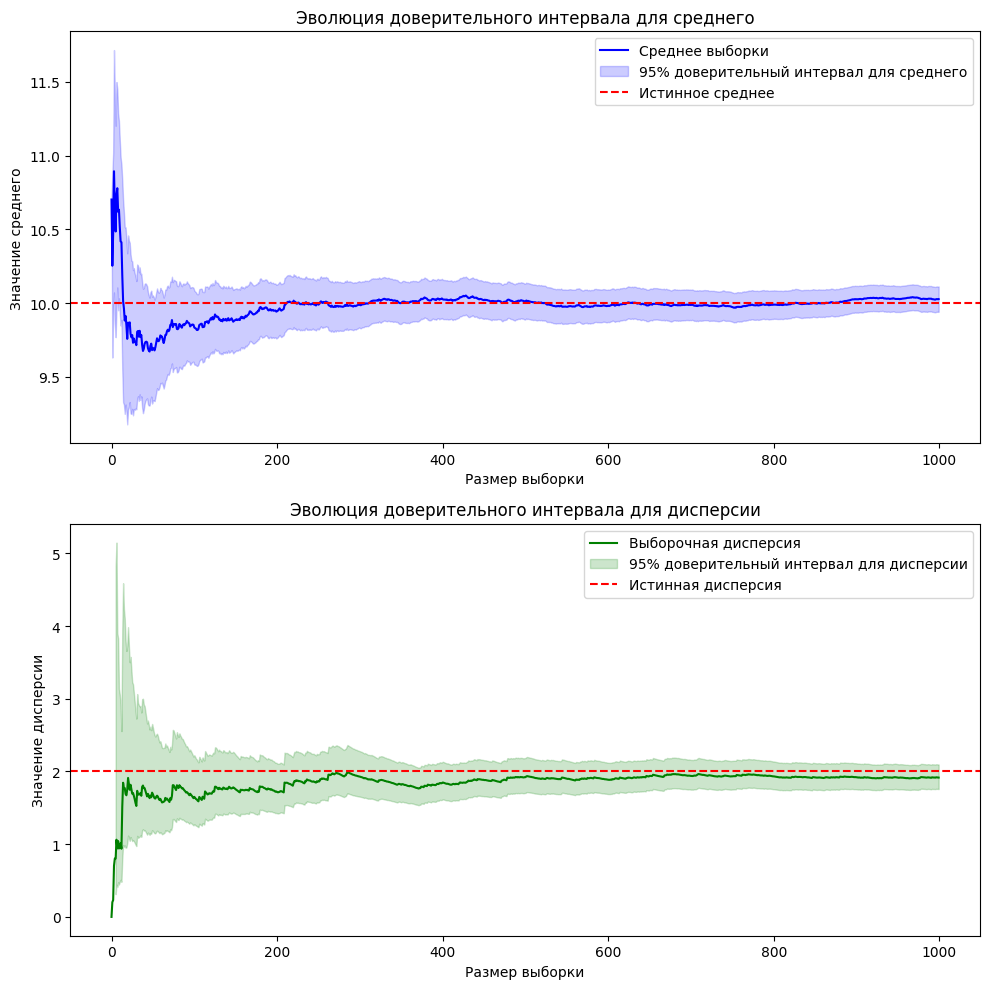

In [71]:

# Визуализация
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Доверительный интервал для среднего
axs[0].plot(means, label="Среднее выборки", color="blue")
axs[0].fill_between(range(len(data)), ci_mean_lower, ci_mean_upper, color="blue", alpha=0.2, label="95% доверительный интервал для среднего")
if true_mean is not None:
    axs[0].axhline(y=true_mean, color="red", linestyle="--", label="Истинное среднее")
axs[0].set_title("Эволюция доверительного интервала для среднего")
axs[0].set_xlabel("Размер выборки")
axs[0].set_ylabel("Значение среднего")
axs[0].legend()

# Доверительный интервал для дисперсии
axs[1].plot(variances, label="Выборочная дисперсия", color="green")
axs[1].fill_between(range(len(data))[5:], ci_variance_lower[5:], ci_variance_upper[5:], color="green", alpha=0.2, label="95% доверительный интервал для дисперсии")
if true_variance is not None:
    axs[1].axhline(y=true_variance, color="red", linestyle="--", label="Истинная дисперсия")
axs[1].set_title("Эволюция доверительного интервала для дисперсии")
axs[1].set_xlabel("Размер выборки")
axs[1].set_ylabel("Значение дисперсии")
axs[1].legend()

plt.tight_layout()
plt.savefig('5_2.eps', format='eps')
plt.show()


#### Task 5.3

Пусть $X_1, X_2, \ldots, X_n$ — независимые случайные величины, имеющие распределение Коши с параметрами $a$ и $b$, то есть $X_i \sim K(a, b)$ для $i = 1, 2, \ldots, n$. 

Сумма этих случайных величин определяется как:

$$
S_n = X_1 + X_2 + \ldots + X_n.
$$


Свойство устойчивости распределения Коши заключается в том, что сумма независимых случайных величин, имеющих это распределение, также будет иметь распределение Коши. Формально это можно записать следующим образом:
$$
S_n \sim K(na, nb).
$$


Это означает, что если $X_i$ имеют распределение Коши с параметрами $a$ и $b$, то нормированная сумма $S_n / n \sim K(a, b)$.


Характеристическая функция распределения Коши имеет вид:

$$
\phi(t) = \exp \{ x_0 i t - \gamma |t|\}.
$$


Это свойство позволяет показать, что сумма независимых случайных величин с этим распределением также будет иметь характеристическую функцию того же вида.


In [72]:
def simulate_sums_matrix(n, num_samples=1000, x0=0, gamma=1):
    samples = cauchy_distr(n * num_samples, x0, gamma)
    samples = samples.reshape(n, num_samples)
    
    # Суммируем по строкам, чтобы получить S_n для каждого из num_samples
    sums = np.sum(samples, axis=1) / num_samples # размер (num_samples,)
    
    return sums


In [75]:
def remove_outliers(data, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = np.percentile(data, lower_quantile * 100)
    upper_bound = np.percentile(data, upper_quantile * 100)
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    return filtered_data

def plot_results(n, num_samples=1000, x0=0, gamma=1):
    sum_all = simulate_sums_matrix(n, num_samples, x0, gamma)
    sums = remove_outliers(sum_all)

    x_min  = sums.min()
    x_max  = sums.max()
    N = 10 ** 5
    X = np.linspace(x_min, x_max, N)
    Y = cauchy_density(X, x0, gamma)

    plt.figure(figsize=(12, 6))
    plt.hist(sums, bins='auto', density=True, alpha=0.6, color='b', label=f'Normalized sum (n={n})')
    plt.plot(X, Y, color='r', label='Constructed density')
    plt.title('Распределение сумм S_n из распределения Коши')
    plt.xlabel('Значение суммы')
    plt.ylabel('Плотность вероятности')
    plt.legend()
    plt.grid()
    plt.savefig('5_3.eps', format='eps')
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


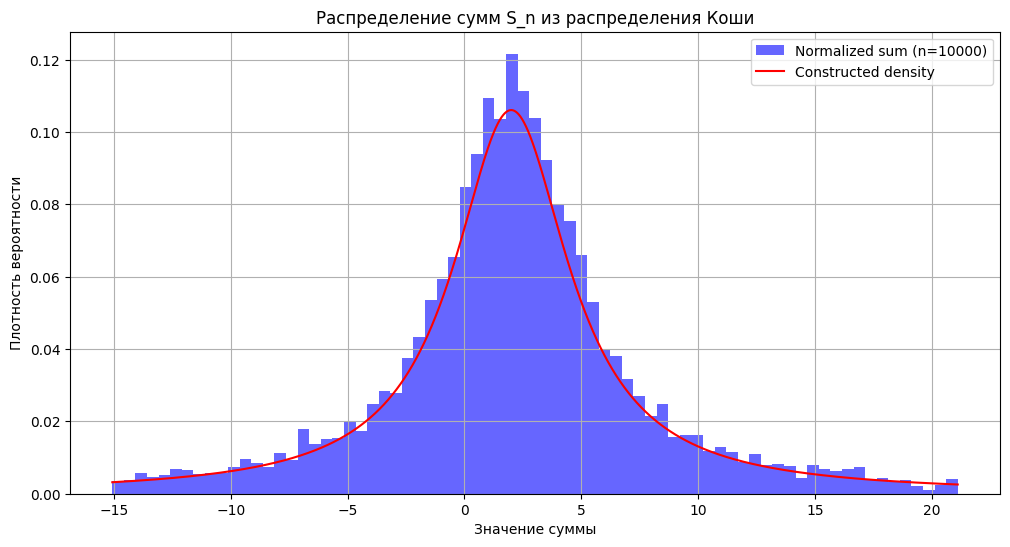

In [76]:
n = 10 ** 4  # Количество выборок для суммирования
plot_results(n, x0=2, gamma =3)


### Task 6

Необходимо вычислить следующий интеграл:
$$
I = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\cdots\int_{-\infty}^{\infty}
\dfrac{e^{-(x_1^2+x_2^2+\dots+x_{10}^2 + \frac{1}{2^7 x_1^2\cdots x_{10}^2})}}{x_1^2\cdot\ldots\cdot x_{10}^2}
dx_1dx_2\dots dx_{10}
$$

1. Методом Монте-Карло
2. Методом квадратур, сводя задачу к вычислению собственного интеграла
Римана.

Также необходимо оценить точность вычислений для каждого из двух случаев.

Перепишем интеграл немного в другом виде.\
Заметим, что в подинтегральной функции можно выделить
$$
    \rho(x_1,x_2,\dots,x_{10}) = \frac{1}{\sqrt{\pi}^{10}}\exp\left\{ -\sum_{i=1}^{10}x_i^2 \right\},
$$
где $\rho(x_1,x_2,\dots,x_{10})$ - плотность нормального распределения $\eta \sim N(0, \sigma^2 = 1/2)$. \
Тогда оставшуюся часть можно записать в ф-ию 
$$
    f(x_1,x_2,\dots,x_{10}) = \exp\left\{- \frac{1}{2^7 \prod_{i=1}^{10}x_i^2} \right\} ({\prod_{i=1}^{10}x_i^2})^{-1} 
$$
Теперь перепишем получившийся интеграл
$$
\begin{aligned}
I= \pi^5\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\cdots\int_{-\infty}^{\infty}f(x_1,x_2,\dots,x_{10}) \rho(x_1,x_2,\dots,x_{10}),
dx_1dx_2\dots dx_{10},
\end{aligned}
$$
который равняется $\mathbb{E}[f(\eta)]$. \
Таким образом получили первый способ моделирования.

In [77]:
def calc_monte_carlo(n_samples):
    if n_samples <= 0:
        raise Exception(f'Invalid n_samples {n_samples}')
    
    count = 10 # magic number for count internal iter
    const_before = np.pi ** 5
    variance = 0.5

    sample_norm = np.sqrt(variance) * box_muller_one(count * n_samples).reshape(count, n_samples)
    f_x2_part = 1 / np.power(sample_norm, 2).prod(axis=0)
    f_exp_part = np.exp(- f_x2_part / 2**7)
    return (const_before * f_exp_part * f_x2_part).mean()

In [ ]:
n_samples = 10**7
integral_monte_carlo = calc_monte_carlo(n_samples)
integral_monte_carlo

125.20847649375152

#### Task 6.1.2

Теперь решим задачу методом прямоугольников, для этого нужно сделать замену(интеграл не собственный). \
Во-первых, обозначит подынтегральную функцию $F(x_1,x_2,\ldots,x_{10})$, и заметим, что $F(x_1,x_2,\ldots,-x_i ,\ldots,x_{10}) = F(x_1,x_2,\ldots,x_i ,\ldots,x_{10}),~ \forall i=1, \ldots, 10$. \
Таким образом можно считать интеграл только по неотрицательным значениям и потом домножить на 2 каждый интеграл.  \
Рассмотрим замену $x_i = \tg(\frac{\pi}{2}\phi_i),~i=1,\ldots,10$. Такая замена может напоминать универсальную тригонометрическую подстановку ($dx_i = \frac{\pi}{2} \frac{1}{\cos^{2}({\frac{\pi}{2}} \phi_i)}d\phi_i $). \
Теперь область интегрирования будет $[0;1]^{10}$, значения тангенса будут из первой четверти. 



Интеграл равен
$$
\begin{aligned}
I &= \pi^{10}\int_{0}^1\int_{0}^{1}\cdots\int_{0}^1 g(\phi_1,\phi_2,\ldots,\phi_{10})d\phi_1d\phi_2\dots d\phi_{10}, \\
g(\phi_1,\phi_2,\ldots,\phi_{10}) &= \frac{1}{\prod^{10}_{i=1}\cos^2\left(\frac{\pi}{2}\phi_i\right) \tg^2\left(\frac{\pi}{2}\phi_i\right)}
\exp\left\{ -\left( \sum_{i=1}^{10}\tg^2\left(\frac{\pi}{2}\phi_i\right) + \frac{1}{2^7}\prod^{10}_{i=1} \tg^{-2}\left(\frac{\pi}{2}\phi_i\right) \right) \right\}.
\end{aligned}
$$
Учтём, что 
$$
    \cos(x) \tg(x) = \sin(x)
$$


Воспользуемся методом прямоугольников: разобъём отрезки $[0,1]$ на $N$ равных частей:
$$
0=x_k^0<x_k^2<\ldots<x_k^{2 N}=1,~ k=1, \ldots, 10.
$$

На каждой части разбиения каждого из десяти отрезков $[0,1]$ возьмём середину:
$$
x_k^1, x_k^3, \ldots, x_k^{2 N-1},~ k=1, \ldots, 10.
$$

Получается записать интеграл можно в виде
$$
    I \approx \left( \dfrac{\pi}{N} \right)^{10} \sum_{i=1}^{N}\dots\sum_{i_{10}=1}^{N} g(x_1^{2i_1 - 1}, x_2^{2i_2 - 1}, \dots, x_{10}^{2i_{10} - 1})
$$

Теперь заметим, что нет разницы в каком порядке интегрировать. Так же, не влияет на результат перестановки вида 
$$
g(\phi_1,\phi_2,\ldots, \phi_i,\ldots, \phi_j, \ldots,\phi_{10}) = g(\phi_1,\phi_2,\ldots, \phi_j,\ldots, \phi_i, \ldots,\phi_{10}),
~ \forall i, j:~ i,j = 1, \ldots, 10,~ i \ne j.
$$
Если представить значение ф-ии в узлах как тензор, то он получится симметричный.

Данное замечание позволяет нам группировать индексы 
Мы можем представить сумму в виде $1\leq i_0\leq i_1\leq\dots \leq i_{10}\leq N$, а значения в узлах домножать на количество сочетаний. \
Пусть у нас $l$ - различных значений, тогда будет сочетание вида
$$
С^{m}_{m_1, \ldots, m_l} = \frac{10!}{m_1!m_2!\cdots m_{l}!},
$$
где $m_k!$ - количество индексов в наборе $(i_1,i_2,\dots,i_{10})$, равных $k$.

$$
    I \approx \left( \dfrac{\pi}{N} \right)^{10} \sum_{1\leq i_0\leq i_1\leq\dots \leq i_{10}\leq N} С^{m}_{m_1, \ldots, m_l} ~ g(x_1^{2i_1 - 1}, x_2^{2i_2 - 1}, \dots, x_{10}^{2i_{10} - 1})
$$


In [ ]:
def comb_with_replacement(iterable, r):
    pool = np.array(iterable)
    n = len(pool)
    
    indices = np.arange(n)  # Индексы элементов в pool
    combinations = np.array(np.meshgrid(*[indices] * r)).T.reshape(-1, r)
    
    combinations = combinations[combinations[:, -1] >= combinations[:, 0]]
    
    result = pool[combinations]
    
    return result

In [ ]:
comb_with_replacement(np.arange(0, 3), 10)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 2, ..., 2, 2, 2],
       [2, 1, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]])

In [85]:
from itertools import combinations_with_replacement

Я попробовал написать свою версию функции для сочетаний, но с ней программа работает очень медленно, поэтому я решил взять библиотечную версию. \
Разница состоит в реализации выдачи значений, библиотечная ф-ия генератор выдаёт по одному значению и не требует много памяти, я же попытался работать через матричные операции, однако это получилось не оптимально.

In [82]:
def rect_step(x):
        '''
            Calculate values of function  in points
            g(x_1,x_2,\ldots,x_{10})
        '''
        tg_2 = np.power(np.tan(np.pi * x / 2), 2)
        tg_2_sum = tg_2.sum()
        tg_2_prod = tg_2.prod()
        sin_2_prod = np.power(np.sin(np.pi * x / 2), 2).prod()
        return np.exp(- tg_2_sum - 1 / (2**7 * tg_2_prod)) / sin_2_prod
def C_m(indexes):
    '''
        Calculate С^{m}_{m_1, \ldots, m_l}
    '''
    _, counts = np.unique(indexes, return_counts=True) 
    return factorial(10) / np.prod(np.apply_along_axis(factorial, 0, counts))

def calc_integral_rect(grid_size):
    '''
        rectangle method for calculate integral
    '''
    if grid_size <= 0:
        raise Exception(f'Invalid grid_size {grid_size}')
    shift_const = 0.5 # The first point can't be less than 0.5\(N+1)
    grid = np.linspace(shift_const/(grid_size+1), 1 - shift_const/(grid_size+1), num=grid_size, endpoint=True)
    combinations = combinations_with_replacement(np.arange(0, grid_size), 10)
    res = 0
    for combination in combinations: 
        # combination - tuple, so we will convert it to list for indexing
        g_step = rect_step(grid[list(combination)])
        res += C_m(combination) * g_step
    return (np.pi / grid_size)**10 * res

#### Task 6.2

In [78]:
step = 10**4
N_start = 10**3
N_end = N_start + 10**6
n_tests = (N_end - N_start) // step + 1

test_monte_carlo = np.zeros(n_tests)
for i in range(n_tests):
    N_curr = N_start + i * step
    result = calc_monte_carlo(N_curr)
    test_monte_carlo[i] = result

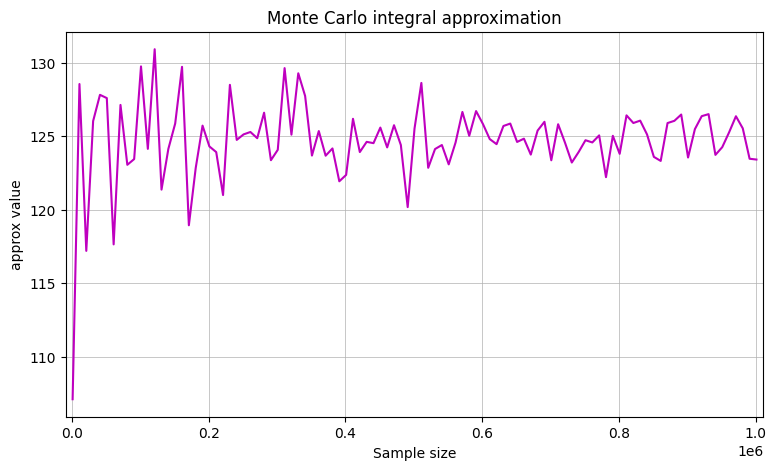

In [80]:
grid = np.linspace(N_start, N_end, num=n_tests, endpoint=True)

fig = plt.figure(figsize=(9,5))

plt.plot(grid, test_monte_carlo, color='m')

plt.grid('minor', linewidth=0.5)
plt.xlim([N_start-step, N_end+step])
plt.xlabel('Sample size')
plt.ylabel('approx value')
plt.title('Monte Carlo integral approximation')
plt.savefig('6_2.eps', format='eps')
plt.show()

In [86]:
step = 1
N_start = 5
N_end = 14
n_tests = (N_end - N_start) // step + 1
test_params = np.arange(N_start, N_end + 1, step)

test_quad = np.zeros(n_tests)
for i in range(n_tests):
    test_quad[i] = calc_integral_rect(test_params[i])
    print(test_quad[i])

72.15472877077528
89.60879573607747
104.17111236489256
107.98482647995067
109.91044033078586
112.44919128608936
114.77207175157382
116.4284049939123
117.59812235217453
118.5226274969937


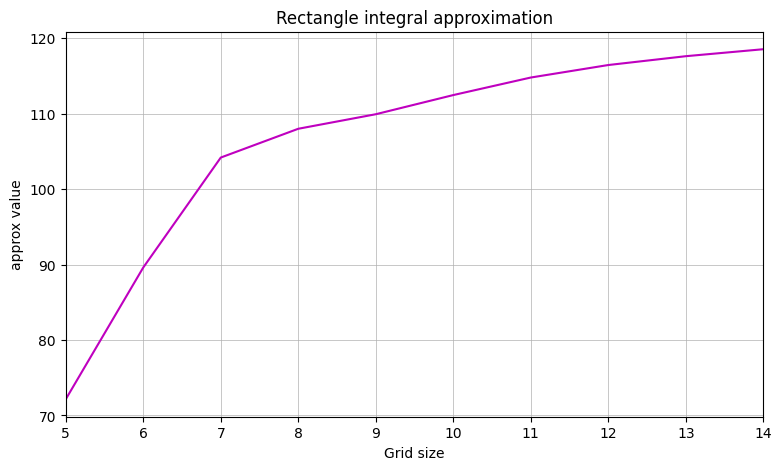

In [87]:
grid = np.linspace(N_start, N_end, num=n_tests, endpoint=True)

fig = plt.figure(figsize=(9,5))

plt.plot(grid, test_quad, color='m')

plt.grid('minor', linewidth=0.5)
plt.xlim([N_start, N_end])
plt.xlabel('Grid size')
plt.ylabel('approx value')
plt.title('Rectangle integral approximation')
plt.savefig('6_2(2).eps', format='eps')
plt.show()